# Hello! I'm Ujjwal Shekhar:)
I will be analyzing the database of ~80 million Indian district court data across states from the Development Data Lab.

The csv file has been downloaded from [the dropbox link](https://www.dropbox.com/sh/hkcde3z2l1h9mq1/AAB2U1dYf6pR7qij1tQ5y11Fa/csv?dl=0&subfolder_nav_tracking=1).

The metadata can be found here:
- [Acts sections metadata](https://docs.google.com/spreadsheets/d/e/2PACX-1vTNxZtceqgzYlUogz-gJfMfqm-RygJZcqfZiFCQAsJYFG7BU1_ZT5aKTPrNODeDgRnoyZFBnjt2sghd/pubhtml)
- [All cases metadata](https://docs.google.com/spreadsheets/u/1/d/e/2PACX-1vSkFghNxGjLxIAsjvUPkW8IV2AF1vf2KOQV93vMhB0TD3CBT13gah1LczI8W0d3Eom1zPcroBuPQ-uy/pubhtml)
- [Judges metadata](https://docs.google.com/spreadsheets/d/e/2PACX-1vSqcp7VlnFB4ujCCHV5uGHjBlwYf7Mo4B3N3aqdiAukS7VMY8lLGU9ejhHH4c8qCse8l1kc8yIkCnq9/pubhtml)

The following project was done as a part of the recruitment task given by [Precog Research Lab](https://precog.iiit.ac.in/).

# Importing modules and libraries

In [1]:
# IMPORTING MODULES
import os
import random
import numpy as np 
import pandas as pd 
import warnings
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import matplotlib 
from sklearn.preprocessing import LabelEncoder
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
from plotly.offline import init_notebook_mode, iplot

from sklearn.model_selection import train_test_split

init_notebook_mode(connected=True)

# Context
![Shashi Tharoor gif](https://2.bp.blogspot.com/-6r5_T5XrC9Q/U6BLfMvIoLI/AAAAAAAABIc/kC5zGcduYCg/s1600/Waqt-ShashiKapoor.gif)
    
Ask any indian how they feel about the judicial system of their country, and they will come up with constant anecdotes of cases being stuck for years. The confidence that people have in our country's judicial system seems low, with as many as [4.7 crore cases](https://www.thehindu.com/news/national/indian-judiciary-pendency-data-courts-statistics-explain-judges-ramana-chief-justiceundertrials/article65378182.ece) pending.

We will look at a subset of cases (from 2010 to 2018) and look at judges' data and various other data provided to us. This will be a part of the **ANALYSIS** section of the recruitment task given.

Following this, we come up with a classification problem that will help with [TBX]. This will be a part of the **CLASSIFICATION** section.

```
NOTE: The markdown provided in this `.ipynb notebook` will also be clubbed together in the README.MD file in the Github Repository associated with the notebook.
```

# Setting path variables 
We will setup global path variables for easy access and uniformity throughout the notebook.

**_NOTE_**:
- Since each `cases_{year}.csv` file is very large, we will store the path to the `cases` folder instead.
- Similar reasons for the `/keys/` folder. 

In [2]:
JUDICIAL_DATA_CSV_FOLDER_PATH = "/kaggle/input/precog-recruitment-task-csv/"

ACTS_SECTIONS_CSV = os.path.join(
                        JUDICIAL_DATA_CSV_FOLDER_PATH, 
                        "acts_sections/acts_sections.csv"
                    )

CASES_CSV_FOLDER = os.path.join(
                        JUDICIAL_DATA_CSV_FOLDER_PATH, 
                        "cases/cases/"
                    )

JUDGES_CSV = os.path.join(
                        JUDICIAL_DATA_CSV_FOLDER_PATH,
                        "judges_clean/judges_clean.csv"
                    )
KEYS_CSV_FOLDER = os.path.join(
                        JUDICIAL_DATA_CSV_FOLDER_PATH, 
                        "keys/keys/"
                    )
print( f"""
    Judges CSV file path : {JUDGES_CSV}
    Cases CSV folder path : {CASES_CSV_FOLDER}
    Acts Sections CSV file path: {ACTS_SECTIONS_CSV}
    Keys CSV file path: {KEYS_CSV_FOLDER}
""")


    Judges CSV file path : /kaggle/input/precog-recruitment-task-csv/judges_clean/judges_clean.csv
    Cases CSV folder path : /kaggle/input/precog-recruitment-task-csv/cases/cases/
    Acts Sections CSV file path: /kaggle/input/precog-recruitment-task-csv/acts_sections/acts_sections.csv
    Keys CSV file path: /kaggle/input/precog-recruitment-task-csv/keys/keys/



# Pre-processing and analyzing data 
We will try analyzing the datasets we have. But before we analyze the data itself, we must get comfortable with the database and how it is structured and ensure that the data types are appropriate.
Following this we will look at many exploratory features of the data provided, this will be done for every file and at a later point, the preprocessing part will be standardised as a function for future use.


## Judges data
The [Judges metadata](https://docs.google.com/spreadsheets/d/e/2PACX-1vSqcp7VlnFB4ujCCHV5uGHjBlwYf7Mo4B3N3aqdiAukS7VMY8lLGU9ejhHH4c8qCse8l1kc8yIkCnq9/pubhtml) file gives us the following information, 

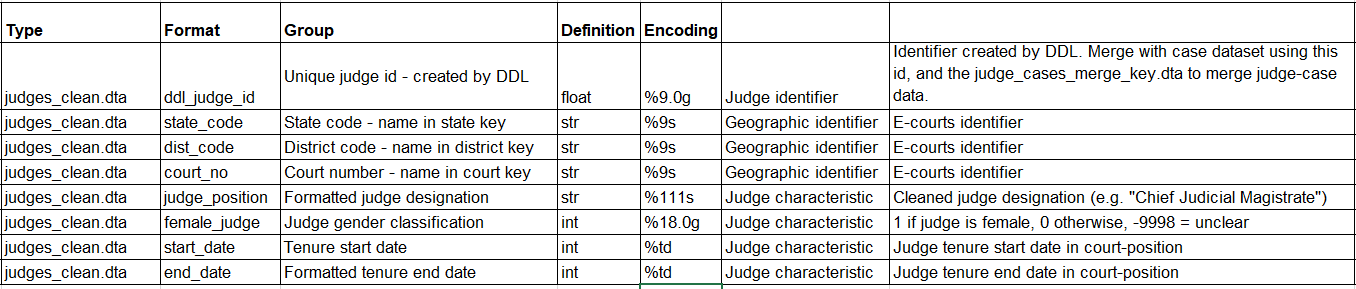

In [73]:
df = pd.read_csv(JUDGES_CSV)
df.head()

ddl_judge_id  state_code  dist_code  court_no             judge_position  \
0             1           1          1         1  chief judicial magistrate   
1             2           1          1         1  chief judicial magistrate   
2             3           1          1         1  chief judicial magistrate   
3             4           1          1         1  chief judicial magistrate   
4             5           1          1         1  chief judicial magistrate   

  female_judge  start_date    end_date  
0  0 nonfemale  20-09-2013  20-02-2014  
1  0 nonfemale  31-10-2013  20-02-2014  
2  0 nonfemale  21-02-2014  31-05-2016  
3  0 nonfemale  01-06-2016  06-06-2016  
4  0 nonfemale  06-06-2016  07-07-2018

Let's check whether or not the data type of each column is correct.

In [74]:
df.dtypes

ddl_judge_id       int64
state_code         int64
dist_code          int64
court_no           int64
judge_position    object
female_judge      object
start_date        object
end_date          object
dtype: object

We can see that the `object` datatypes will actually be of the following types
- **judge_position** : `string`
- **female_judge** : [TBX]
- **start_date** and **end_date** : `Pandas.DateTime`

We will correct these dataypes first

In [75]:
object_columns = df.select_dtypes(include = "object").columns
df[object_columns] = df[object_columns].astype("string")
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce').dt.date
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce').dt.date

df.dtypes

ddl_judge_id       int64
state_code         int64
dist_code          int64
court_no           int64
judge_position    string
female_judge      string
start_date        object
end_date          object
dtype: object

### Changing columns labels and replacing less readable values
On referring the DDL provided metadata (shown above), we realize that the following encoding was used in the `female_judge` column.

- 0 : male
- 1 : female
- -9998 : unclear

In [76]:
df['female_judge'] = df['female_judge'].replace(
                ['0 nonfemale', '1 female', '-9998 unclear'],
                ['Male', 'Female', 'Unclear/Others']
            )
df = df.rename({'female_judge': 'gender'}, axis=1)
df['gender'] = df['gender'].astype("string")
df['gender'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: gender, dtype: string

Since there is no numerical data to be analyzed, we will not use the `df.describe()` method here.

### Correlation matrix using Plotly.Express
We will use the correlation matrix to ensure that there are no columns with high correlation

**_NOTE:_** The corresponding correlation value has been shown as a colour, please refer to the color beside the correlation matrix image.

In [77]:
df = df.dropna()

In [78]:
df.isnull().sum()

ddl_judge_id      0
state_code        0
dist_code         0
court_no          0
judge_position    0
gender            0
start_date        0
end_date          0
dtype: int64

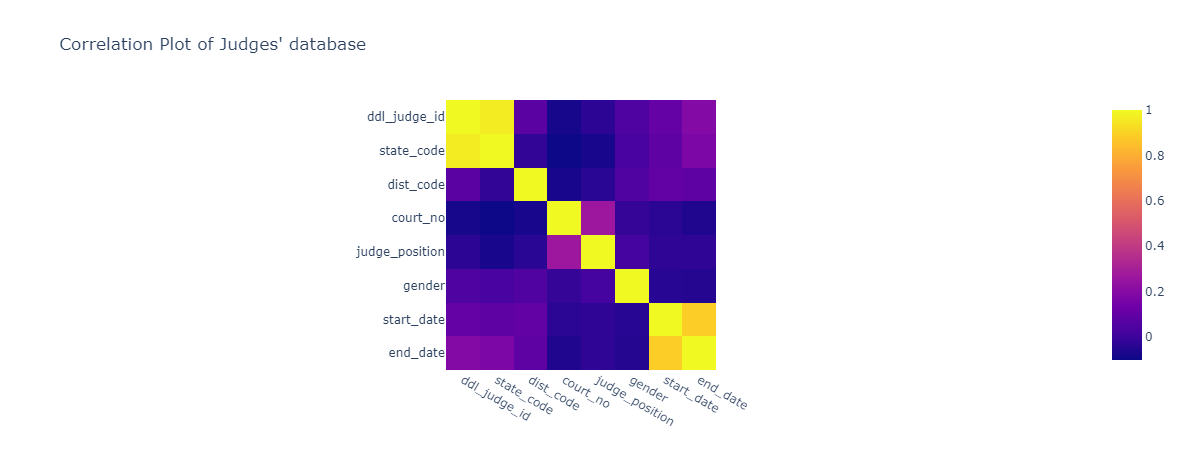

In [79]:
le = LabelEncoder()
df['judge_position'] = le.fit_transform(df['judge_position']) 
df['gender'] = le.fit_transform(df['gender'])
df['start_date'] = le.fit_transform(df['start_date'])
df['end_date'] = le.fit_transform(df['end_date'])

px.imshow(df.corr(),title="Correlation Plot of Judges' database")

- We can see that `ddl_judge_id` and `state_code` are highly positively correlated, with a correlation value of ~$0.97$, this might be happening since 
- We can also see that `start_date` and `end_date` are also highly positively correlated, which also makes sense since `start_date` and`end_date` are constrained.
- `court_no` and `judge_position` are also quite correlated with ~$0.27$. A possible explanation might be that The Supreme Court will have a greater density of higher ranked judges. Although we might investigate this further.
- `end_date` also has a correlation ~$0.19$ with `dist_code` and `state_code`. 
<br>

## Making a preprocessing function for Judges' csv file.

In [80]:
def get_preprocessed_judges():
    df = pd.read_csv(JUDGES_CSV)
    object_columns = df.select_dtypes(include = "object").columns
    df[object_columns] = df[object_columns].astype("string")
    df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce').dt.date
    df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce').dt.date
    df['female_judge'] = df['female_judge'].replace(
                                            ['0 nonfemale', '1 female', '-9998 unclear'],
                                            ['Male', 'Female', 'Unclear/Others']
                                        )
    df = df.rename({'female_judge': 'gender'}, axis=1)
    df['gender'] = df['gender'].astype("string")
    df = df.dropna()
    
    df.dtypes
    return df

df = get_preprocessed_judges()


### Overall gender demographic across judges

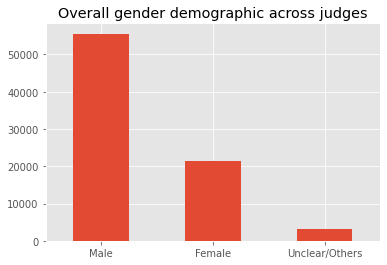

In [81]:
num_genders = df['gender'].value_counts()
num_genders.head()

fig = num_genders.plot.bar(x='lab', y='val', rot=0, title="Overall gender demographic across judges")

The ratio of male judges to female is approximately $2:1 :: Male : Female$

In [82]:
df['court_no'].nunique()

816

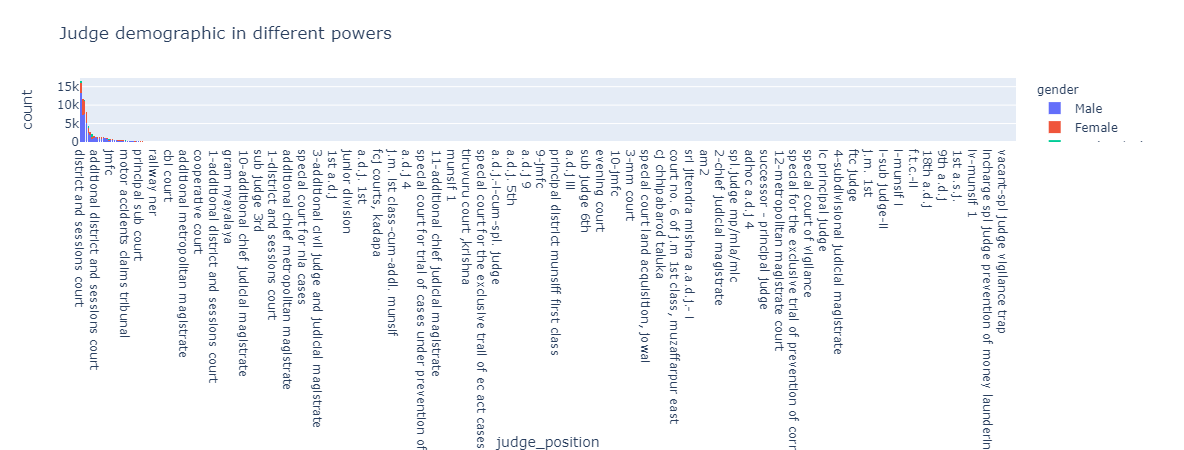

In [83]:
fig=px.histogram(df, 
                 x="judge_position",
                 color="gender",
                 hover_data=df.columns,
                 title="Judge demographic in different powers",
                 barmode="stack",
                 )\
      .update_xaxes(categoryorder="total descending")
fig.show()

Using the above histogram plot, we can see that majority of the judges are:

- Chief judicial magistrate
- Civil judge senior division
- Civil judge junior division
- Civil court
- Judicial magistrate court
- Additional Chief judicial magistrate
- City civil and sessions court
- Additional district and sessions court
- Family court
- Principal district and sessions court
- Principal civil judge; etc,.

We also observe that there are more male judges than female judges


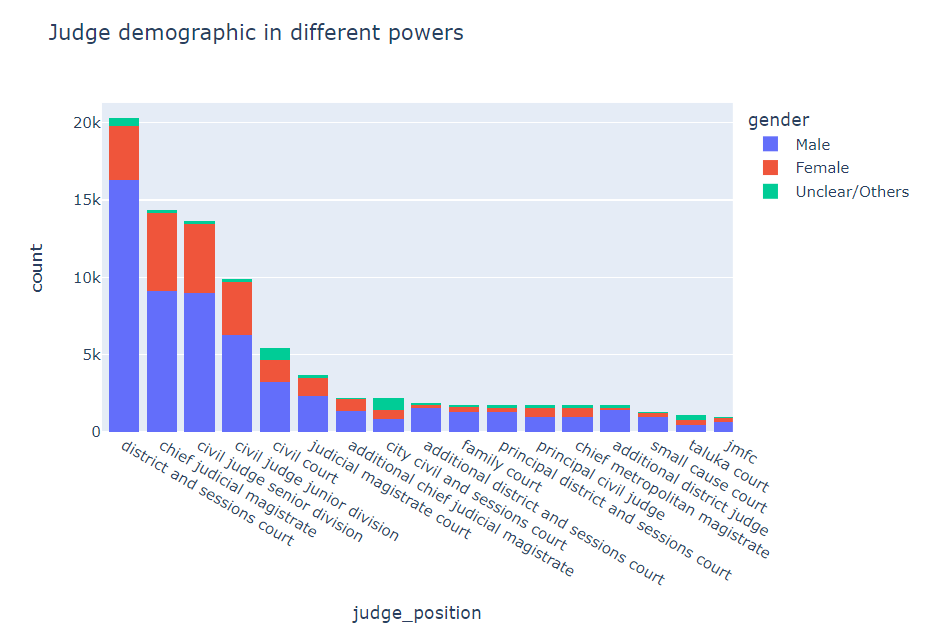

### Judges' gender demographic in different states

In [84]:
state_vs_judges = df.groupby(['state_code', 'gender'])['state_code'].value_counts().to_frame()
state_vs_judges.columns = ['count']
state_vs_judges = state_vs_judges.droplevel(2)
state_vs_judges = state_vs_judges.reset_index()

state_vs_judges.head()

state_code          gender  count
0           1          Female   5543
1           1            Male  14329
2           1  Unclear/Others    402
3           2          Female    998
4           2            Male   1925

In [85]:
df.head()

ddl_judge_id  state_code  dist_code  court_no             judge_position  \
0             1           1          1         1  chief judicial magistrate   
1             2           1          1         1  chief judicial magistrate   
2             3           1          1         1  chief judicial magistrate   
3             4           1          1         1  chief judicial magistrate   
4             5           1          1         1  chief judicial magistrate   

  gender  start_date    end_date  
0   Male  2013-09-20  2014-02-20  
1   Male  2013-10-31  2014-02-20  
2   Male  2014-02-21  2016-05-31  
3   Male  2016-01-06  2016-06-06  
4   Male  2016-06-06  2018-07-07

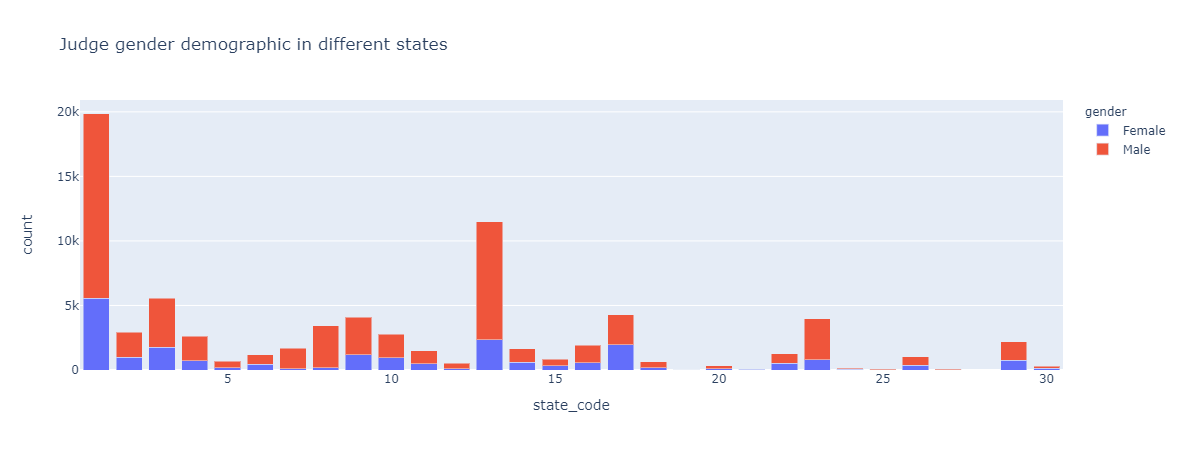

In [86]:
fig=px.bar(state_vs_judges[state_vs_judges['gender'] != 'Unclear/Others'], 
                 x="state_code",
                 y="count",
                 color="gender",
                 hover_data=state_vs_judges.columns,
                 title="Judge gender demographic in different states",
                 barmode="stack",
                 )
fig.show()

We can see that the state with `state_code` = 1 has the highest total number of judges (~$22000$)

**_NOTE:_** The states have been anonimized using state codes.


We seem to have hit a roadblock, the judges csv seemingly gives no other insight.

### Trying to get hints for further analysis

Let's check if `end_date` has `NaN` values, so we can get the difference between them to get `total_days` they have worked for.

In [87]:
df.isnull().sum()

ddl_judge_id      0
state_code        0
dist_code         0
court_no          0
judge_position    0
gender            0
start_date        0
end_date          0
dtype: int64

Turns out that the `end_date` column DOES NOT have `Nan` values, if it did, we would replace the `NaN` values to a date that can't logically be valid (like `01-01-2222`). Then we can simply get rid of all entries in the`total_days` column that can't be physically possible. 

### Creating the total days column

In [88]:
df['total_days'] = (df['end_date'] - df['start_date']) / np.timedelta64(1, 'D')
df

ddl_judge_id  state_code  dist_code  court_no  \
0                 1           1          1         1   
1                 2           1          1         1   
2                 3           1          1         1   
3                 4           1          1         1   
4                 5           1          1         1   
...             ...         ...        ...       ...   
98471         98472          30          2         8   
98473         98474          30          2         9   
98474         98475          30          2         9   
98475         98476          30          2         9   
98476         98477          30          2        10   

                  judge_position  gender  start_date    end_date  total_days  
0      chief judicial magistrate    Male  2013-09-20  2014-02-20       153.0  
1      chief judicial magistrate    Male  2013-10-31  2014-02-20       112.0  
2      chief judicial magistrate    Male  2014-02-21  2016-05-31       830.0  
3      chief judicial magistrate    Male  2016-01-06  2016-06-06       152.0  
4      chief judicial magistrate    Male  2016-06-06  2018-07-07       761.0  
...                          ...     ...         ...         ...         ...  
98471             criminal cases  Female  2016-04-04  2016-12-15       255.0  
98473             criminal cases  Female  2004-04-21  2013-11-14      3494.0  
98474             criminal cases  Female  2015-01-16  2016-01-16       365.0  
98475             criminal cases  Female  2016-09-12  2017-07-31       322.0  
98476             criminal cases  Female  2017-05-15  2019-01-28       623.0  

[80319 rows x 9 columns]

### Making a temporary dataframe
We make a temporary dataframe and select only the entries with`judge_position` entries occuring more than $2000$ times  

In [89]:
sub_df = df.filter(['judge_position','total_days', 'gender', 'state_code', 'dist_code'], axis=1)\
        [df.groupby('judge_position').judge_position.transform('count')>2000].copy()

sub_df

judge_position  total_days          gender  state_code  \
0        chief judicial magistrate       153.0            Male           1   
1        chief judicial magistrate       112.0            Male           1   
2        chief judicial magistrate       830.0            Male           1   
3        chief judicial magistrate       152.0            Male           1   
4        chief judicial magistrate       761.0            Male           1   
...                            ...         ...             ...         ...   
98464  district and sessions court         7.0          Female          30   
98465  district and sessions court       102.0          Female          30   
98466  district and sessions court       357.0          Female          30   
98467  district and sessions court        13.0            Male          30   
98468  district and sessions court       253.0  Unclear/Others          30   

       dist_code  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
98464          2  
98465          2  
98466          2  
98467          2  
98468          2  

[56956 rows x 5 columns]

### Finding distribution of `judge_position` along different `state_code`

In [90]:
sub_df = sub_df[sub_df['gender'] != 'Unclear/Others']
# sub_df.plot.bar(x="judge_position", y="state_code")

### Violin plot to get insights on the data obtained

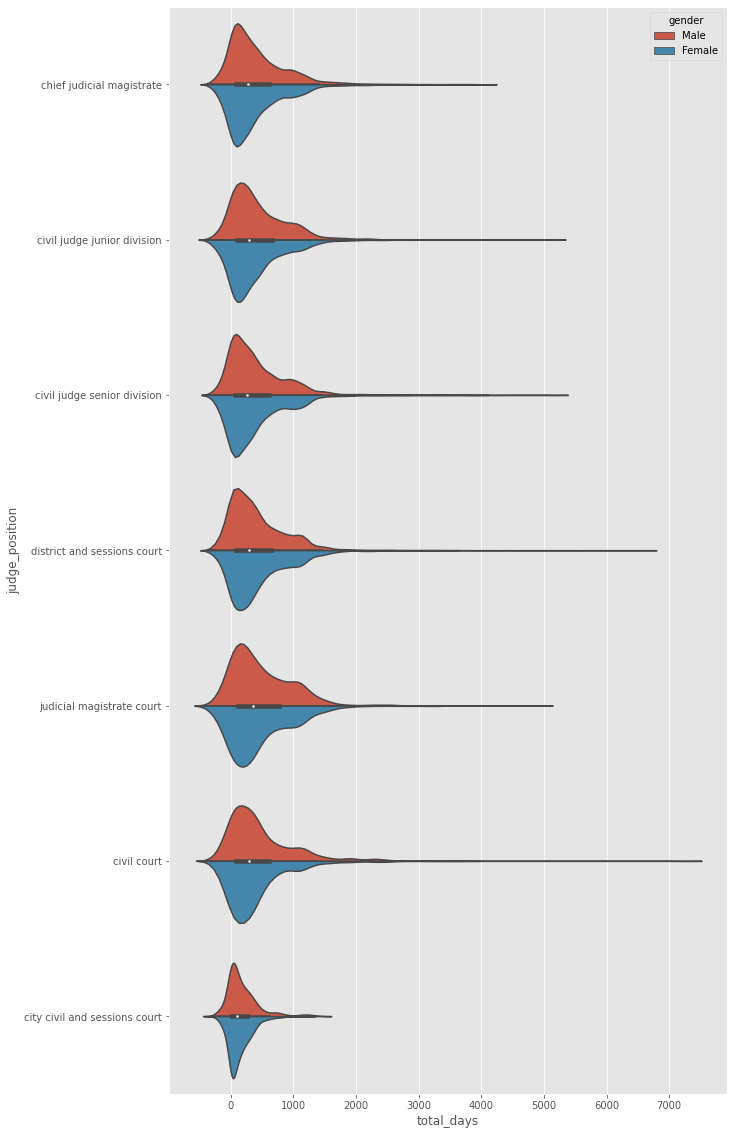

In [91]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.violinplot(
       x='total_days', 
       y='judge_position', 
       data=sub_df, 
       hue='gender', 
       ax=ax,
       title = "Judge_position in total days worked for",
       split='gender'
    )
fig, ax = None, None

### Checking for skewness of features

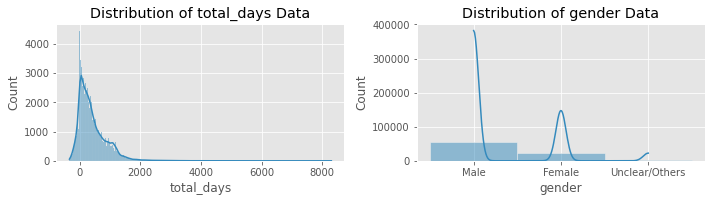

In [92]:
sub_df = df.filter(['total_days', 'gender'], axis=1)
sub_df = sub_df[sub_df['gender'] != 'Unclear/Others']
plt.figure(figsize=(15,10))
for i,col in enumerate(sub_df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
    
sub_df = None
df = None

## Acts Section data
The [Acts Sections metadata](https://docs.google.com/spreadsheets/d/e/2PACX-1vTNxZtceqgzYlUogz-gJfMfqm-RygJZcqfZiFCQAsJYFG7BU1_ZT5aKTPrNODeDgRnoyZFBnjt2sghd/pubhtml) file gives us the following information.

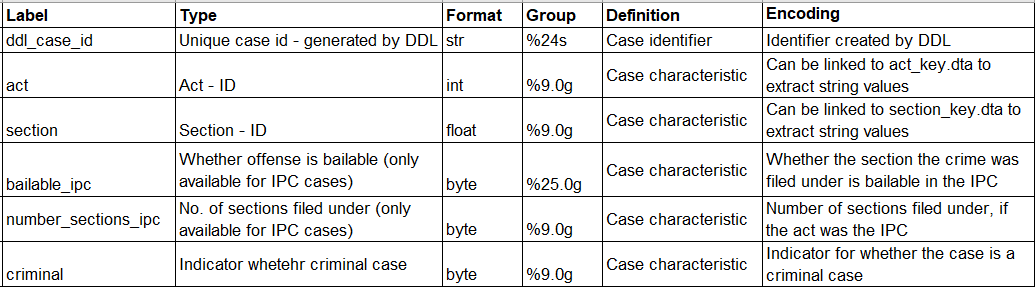

In [15]:
df_acts_sections = pd.read_csv(ACTS_SECTIONS_CSV, dtype='unicode', usecols=['ddl_case_id', 'act', 'section', 'criminal'])
df_acts_sections.head()

ddl_case_id    act section criminal
0  06-03-02-210100004042014  17353     NaN        1
1  23-34-01-229900001012019   4759     NaN        1
2  13-18-03-204000030972016  17353     NaN        1
3  23-28-01-220102000232016   4759     NaN        1
4  01-35-05-203007002652012  17353     NaN        1

In [16]:
df_acts_sections = df_acts_sections[df_acts_sections['act'].notna()]

In [17]:
df_acts_sections.isnull().sum()

ddl_case_id          0
act                  0
section        4834909
criminal             0
dtype: int64

Lets check the data types

In [18]:
df_acts_sections.dtypes

ddl_case_id    object
act            object
section        object
criminal       object
dtype: object

Since we had force`dtype=unicode` all columns now have `dtype` set as an `object`.

### Changing column labels and dtypes of columns

In [19]:
df_acts_sections['ddl_case_id'] = df_acts_sections['ddl_case_id'].astype('string')
df_acts_sections['criminal'] = df_acts_sections['criminal'].astype('int64')
df_acts_sections['act'] = df_acts_sections['act'].astype('int64')
# df_acts_sections['section'] = df_acts_sections['section'].astype('int64')

In [20]:
df_acts_sections.dtypes

ddl_case_id    string
act             int64
section        object
criminal        int64
dtype: object

### Getting the number of criminals

`fig = px.histogram(df, x="criminal")` <br>
**WARNING** : Do not run the code, it might crash your laptop!!

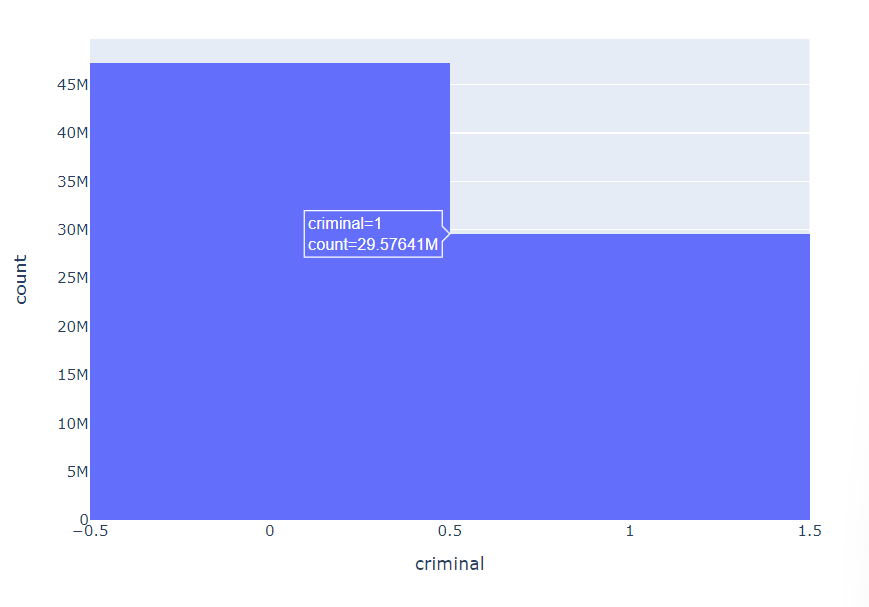

(array([47223661.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 29576414.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

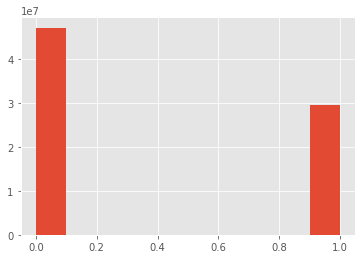

In [270]:
plt.hist(df_acts_sections['criminal'])

## Cases csv 
The [Cases metadata](https://docs.google.com/spreadsheets/u/1/d/e/2PACX-1vSkFghNxGjLxIAsjvUPkW8IV2AF1vf2KOQV93vMhB0TD3CBT13gah1LczI8W0d3Eom1zPcroBuPQ-uy/pubhtml#) file gives us the following information,

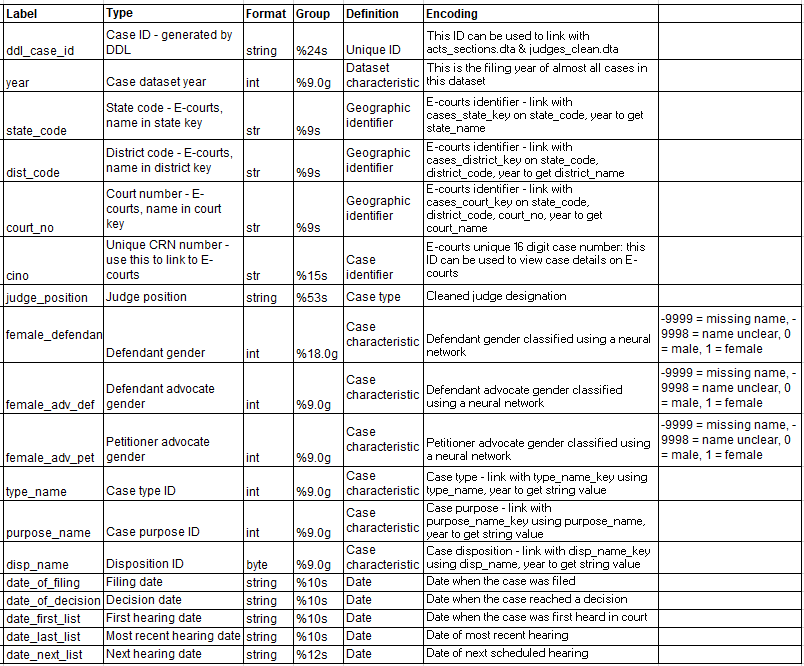

**NOTES:** 
- Since, each `case_{year}.csv` file is huge (~2GB each) we cannot handle more than one data frame at once.
- To be able to obtain insights for every year, we must make functions to handle a single data frame like before, except we can use a for-loop to call these functions for each `case_{year}.csv`.

Let's first make a list of years for easy reproducibility and readibility.

In [271]:
year_list = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

### Exploring a sample csv
We will explore one case file and then make functions after every few steps so we can do the same for all `csv` files in the `CASES_CSV_FOLDER`.

**NOTE**: We will study the `cases_2014.csv` file, this csv has been selected since it is the median of `year_list` (No particular reason!)

In [93]:
df = pd.read_csv(os.path.join(CASES_CSV_FOLDER, "cases_2014.csv"))
df.head

<bound method NDFrame.head of                       ddl_case_id  year  state_code  dist_code  court_no  \
0        01-01-01-201908000022014  2014           1          1         1   
1        01-01-01-201908000032014  2014           1          1         1   
2        01-01-01-201908000052014  2014           1          1         1   
3        01-01-01-201908000062014  2014           1          1         1   
4        01-01-01-201908000072014  2014           1          1         1   
...                           ...   ...         ...        ...       ...   
8874611  33-02-02-219600000252014  2014          33          2         2   
8874612  33-02-02-224400000312014  2014          33          2         2   
8874613  33-02-03-202100000392014  2014          33          2         3   
8874614  33-02-03-202100000452014  2014          33          2         3   
8874615  33-02-03-202100000592014  2014          33          2         3   

                     cino             judge_position fema

Let's check for the dtypes, we can use the data obtained from the [Cases metadata](https://docs.google.com/spreadsheets/u/1/d/e/2PACX-1vSkFghNxGjLxIAsjvUPkW8IV2AF1vf2KOQV93vMhB0TD3CBT13gah1LczI8W0d3Eom1zPcroBuPQ-uy/pubhtml#) file to then convert `object` dtypes to their corresponding valid dtypes.

In [94]:
df.dtypes

ddl_case_id           object
year                   int64
state_code             int64
dist_code              int64
court_no               int64
cino                  object
judge_position        object
female_defendant      object
female_petitioner     object
female_adv_def         int64
female_adv_pet         int64
type_name            float64
purpose_name         float64
disp_name              int64
date_of_filing        object
date_of_decision      object
date_first_list       object
date_last_list        object
date_next_list        object
dtype: object

There are a lot of columns that have to be converted into a non-object dtype!
We will convert them into their intended dtypes.

### Stringify columns

In [95]:
## Changing column datatypes to strings where needed
def convert_str_dtype(df, column_name):
    df[column_name] = df[column_name].astype("string")
    return df

def str_dtypes_preprocess(df, column_list):
    for column_name in column_list:
        df  = convert_str_dtype(df, column_name)
        
    return df

str_column_list=[
    'ddl_case_id',
    'state_code',
    'dist_code',
    'court_no',
    'judge_position'
]

In [96]:
df = str_dtypes_preprocess(df, str_column_list)
df.head(10)

ddl_case_id  year state_code dist_code court_no  \
0  01-01-01-201908000022014  2014          1         1        1   
1  01-01-01-201908000032014  2014          1         1        1   
2  01-01-01-201908000052014  2014          1         1        1   
3  01-01-01-201908000062014  2014          1         1        1   
4  01-01-01-201908000072014  2014          1         1        1   
5  01-01-01-201908000082014  2014          1         1        1   
6  01-01-01-201908000092014  2014          1         1        1   
7  01-01-01-201908000102014  2014          1         1        1   
8  01-01-01-201908000112014  2014          1         1        1   
9  01-01-01-201908000122014  2014          1         1        1   

               cino             judge_position female_defendant  \
0  MHNB030000982014  chief judicial magistrate    -9998 unclear   
1  MHNB030001052014  chief judicial magistrate           0 male   
2  MHNB030001302014  chief judicial magistrate           0 male   
3  MHNB030000512014  chief judicial magistrate           0 male   
4  MHNB030000522014  chief judicial magistrate           0 male   
5  MHNB030000642014  chief judicial magistrate           0 male   
6  MHNB030000652014  chief judicial magistrate           0 male   
7  MHNB030000762014  chief judicial magistrate           0 male   
8  MHNB030000792014  chief judicial magistrate           0 male   
9  MHNB030000802014  chief judicial magistrate           0 male   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male           -9999           -9998     1907.0        5487.0   
1          1 female           -9999               1     1907.0        6304.0   
2          1 female           -9999               0     1907.0        4366.0   
3          1 female           -9998               0     1907.0        4823.0   
4            0 male           -9999               0     1907.0        5487.0   
5          1 female           -9999               0     1907.0        4366.0   
6     -9998 unclear           -9999               1     1907.0        4366.0   
7          1 female           -9999               0     1907.0        5487.0   
8          1 female           -9999               1     1907.0        4823.0   
9     -9998 unclear           -9999               0     1907.0        1282.0   

   disp_name date_of_filing date_of_decision date_first_list date_last_list  \
0         25     2014-01-03       2014-10-28      2014-01-16     2014-09-30   
1         25     2014-01-01       2015-08-10      2014-02-11     2015-08-03   
2         25     2014-01-02       2014-06-10      2014-02-12     2014-05-29   
3         22     2014-01-04       2016-11-14      2014-01-04     2016-11-14   
4         25     2014-01-04       2014-01-04      2014-01-04     2014-01-04   
5         30     2014-01-06       2014-09-05      2014-01-06     2014-08-18   
6          5     2014-01-06       2018-01-03      2014-01-06     2018-01-03   
7         25     2014-01-07       2014-01-07      2014-01-07     2014-01-07   
8         30     2014-01-07       2015-05-06      2014-01-07     2015-04-16   
9         25     2014-01-07       2014-01-17      2014-01-07     2014-01-10   

  date_next_list  
0     2014-10-28  
1     2015-08-10  
2     2014-06-10  
3     2016-11-14  
4     2014-01-04  
5     2014-09-05  
6     2018-01-03  
7     2014-01-07  
8     2015-05-06  
9     2014-01-17

### Cleaning `gender` columns
The column labels and entries are not easy read, we seek to standardize the columns.

In [97]:
## Renaming and replacing values in `female_{X}` column
def fix_gender_dtype1(df, column_name):
    new_column_name = column_name.split('_')[1] + "_gender"

    df[column_name] = df[column_name].replace(
        ['0 nonfemale', '0 male','1 female', '-9998 unclear', '-9999 missing name'],
        ['Male', 'Male', 'Female', 'Unclear/Others', 'Missing']
    )

    df = df.rename({column_name: new_column_name}, axis=1)
    df[new_column_name] = df[new_column_name].astype("string")
    
    return df

## Renaming and replacing values in `female_{X]_{Y}` column
def fix_gender_dtype2(df, column_name):
    new_column_name = column_name.split('_')[1] + "_" + column_name.split('_')[2] + "_gender"
    df[column_name] = df[column_name].replace(
        [0, 1, -9998, -9999],
        ['Male', 'Female', 'Unclear/Others', 'Missing']
    )

    df = df.rename({column_name: new_column_name}, axis=1)
    df[new_column_name] = df[new_column_name].astype("string")
    
    return df
    
def gender_dtypes_preprocess(df):
    for column_name in ['female_defendant', 'female_petitioner']:
        df = fix_gender_dtype1(df, column_name)
        
    for column_name in ['female_adv_def', 'female_adv_pet']:
        df = fix_gender_dtype2(df, column_name)
        
    return df

In [98]:
df = gender_dtypes_preprocess(df)
df.head(10)

ddl_case_id  year state_code dist_code court_no  \
0  01-01-01-201908000022014  2014          1         1        1   
1  01-01-01-201908000032014  2014          1         1        1   
2  01-01-01-201908000052014  2014          1         1        1   
3  01-01-01-201908000062014  2014          1         1        1   
4  01-01-01-201908000072014  2014          1         1        1   
5  01-01-01-201908000082014  2014          1         1        1   
6  01-01-01-201908000092014  2014          1         1        1   
7  01-01-01-201908000102014  2014          1         1        1   
8  01-01-01-201908000112014  2014          1         1        1   
9  01-01-01-201908000122014  2014          1         1        1   

               cino             judge_position defendant_gender  \
0  MHNB030000982014  chief judicial magistrate   Unclear/Others   
1  MHNB030001052014  chief judicial magistrate             Male   
2  MHNB030001302014  chief judicial magistrate             Male   
3  MHNB030000512014  chief judicial magistrate             Male   
4  MHNB030000522014  chief judicial magistrate             Male   
5  MHNB030000642014  chief judicial magistrate             Male   
6  MHNB030000652014  chief judicial magistrate             Male   
7  MHNB030000762014  chief judicial magistrate             Male   
8  MHNB030000792014  chief judicial magistrate             Male   
9  MHNB030000802014  chief judicial magistrate             Male   

  petitioner_gender  adv_def_gender  adv_pet_gender  type_name  purpose_name  \
0              Male         Missing  Unclear/Others     1907.0        5487.0   
1            Female         Missing          Female     1907.0        6304.0   
2            Female         Missing            Male     1907.0        4366.0   
3            Female  Unclear/Others            Male     1907.0        4823.0   
4              Male         Missing            Male     1907.0        5487.0   
5            Female         Missing            Male     1907.0        4366.0   
6    Unclear/Others         Missing          Female     1907.0        4366.0   
7            Female         Missing            Male     1907.0        5487.0   
8            Female         Missing          Female     1907.0        4823.0   
9    Unclear/Others         Missing            Male     1907.0        1282.0   

   disp_name date_of_filing date_of_decision date_first_list date_last_list  \
0         25     2014-01-03       2014-10-28      2014-01-16     2014-09-30   
1         25     2014-01-01       2015-08-10      2014-02-11     2015-08-03   
2         25     2014-01-02       2014-06-10      2014-02-12     2014-05-29   
3         22     2014-01-04       2016-11-14      2014-01-04     2016-11-14   
4         25     2014-01-04       2014-01-04      2014-01-04     2014-01-04   
5         30     2014-01-06       2014-09-05      2014-01-06     2014-08-18   
6          5     2014-01-06       2018-01-03      2014-01-06     2018-01-03   
7         25     2014-01-07       2014-01-07      2014-01-07     2014-01-07   
8         30     2014-01-07       2015-05-06      2014-01-07     2015-04-16   
9         25     2014-01-07       2014-01-17      2014-01-07     2014-01-10   

  date_next_list  
0     2014-10-28  
1     2015-08-10  
2     2014-06-10  
3     2016-11-14  
4     2014-01-04  
5     2014-09-05  
6     2018-01-03  
7     2014-01-07  
8     2015-05-06  
9     2014-01-17

### Clean date-time columns

In [99]:
## Making a standardised function to convert to datetime
def convert_date_time(df, column_name):
    df[column_name] = pd.to_datetime(
            df[column_name], errors='coerce'
        ).dt.date
    
    return df

## Fixing date datatypes 
def date_dtype_preprocess(df, column_list):
    for column_name in column_list:
        df = convert_date_time(df, column_name)
        
    return df

date_column_list = [
    'date_of_filing',
    'date_first_list',
    'date_last_list',
    'date_next_list'
]

In [100]:
df = date_dtype_preprocess(df, date_column_list)
df.head(10)

ddl_case_id  year state_code dist_code court_no  \
0  01-01-01-201908000022014  2014          1         1        1   
1  01-01-01-201908000032014  2014          1         1        1   
2  01-01-01-201908000052014  2014          1         1        1   
3  01-01-01-201908000062014  2014          1         1        1   
4  01-01-01-201908000072014  2014          1         1        1   
5  01-01-01-201908000082014  2014          1         1        1   
6  01-01-01-201908000092014  2014          1         1        1   
7  01-01-01-201908000102014  2014          1         1        1   
8  01-01-01-201908000112014  2014          1         1        1   
9  01-01-01-201908000122014  2014          1         1        1   

               cino             judge_position defendant_gender  \
0  MHNB030000982014  chief judicial magistrate   Unclear/Others   
1  MHNB030001052014  chief judicial magistrate             Male   
2  MHNB030001302014  chief judicial magistrate             Male   
3  MHNB030000512014  chief judicial magistrate             Male   
4  MHNB030000522014  chief judicial magistrate             Male   
5  MHNB030000642014  chief judicial magistrate             Male   
6  MHNB030000652014  chief judicial magistrate             Male   
7  MHNB030000762014  chief judicial magistrate             Male   
8  MHNB030000792014  chief judicial magistrate             Male   
9  MHNB030000802014  chief judicial magistrate             Male   

  petitioner_gender  adv_def_gender  adv_pet_gender  type_name  purpose_name  \
0              Male         Missing  Unclear/Others     1907.0        5487.0   
1            Female         Missing          Female     1907.0        6304.0   
2            Female         Missing            Male     1907.0        4366.0   
3            Female  Unclear/Others            Male     1907.0        4823.0   
4              Male         Missing            Male     1907.0        5487.0   
5            Female         Missing            Male     1907.0        4366.0   
6    Unclear/Others         Missing          Female     1907.0        4366.0   
7            Female         Missing            Male     1907.0        5487.0   
8            Female         Missing          Female     1907.0        4823.0   
9    Unclear/Others         Missing            Male     1907.0        1282.0   

   disp_name date_of_filing date_of_decision date_first_list date_last_list  \
0         25     2014-01-03       2014-10-28      2014-01-16     2014-09-30   
1         25     2014-01-01       2015-08-10      2014-02-11     2015-08-03   
2         25     2014-01-02       2014-06-10      2014-02-12     2014-05-29   
3         22     2014-01-04       2016-11-14      2014-01-04     2016-11-14   
4         25     2014-01-04       2014-01-04      2014-01-04     2014-01-04   
5         30     2014-01-06       2014-09-05      2014-01-06     2014-08-18   
6          5     2014-01-06       2018-01-03      2014-01-06     2018-01-03   
7         25     2014-01-07       2014-01-07      2014-01-07     2014-01-07   
8         30     2014-01-07       2015-05-06      2014-01-07     2015-04-16   
9         25     2014-01-07       2014-01-17      2014-01-07     2014-01-10   

  date_next_list  
0     2014-10-28  
1     2015-08-10  
2     2014-06-10  
3     2016-11-14  
4     2014-01-04  
5     2014-09-05  
6     2018-01-03  
7     2014-01-07  
8     2015-05-06  
9     2014-01-17

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8874616 entries, 0 to 8874615
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ddl_case_id        string 
 1   year               int64  
 2   state_code         string 
 3   dist_code          string 
 4   court_no           string 
 5   cino               object 
 6   judge_position     string 
 7   defendant_gender   string 
 8   petitioner_gender  string 
 9   adv_def_gender     string 
 10  adv_pet_gender     string 
 11  type_name          float64
 12  purpose_name       float64
 13  disp_name          int64  
 14  date_of_filing     object 
 15  date_of_decision   object 
 16  date_first_list    object 
 17  date_last_list     object 
 18  date_next_list     object 
dtypes: float64(2), int64(2), object(6), string(9)
memory usage: 1.3+ GB


We will drop all entries with any null value before studying the transforming strings by labelling them for correlation study

In [102]:
df = df.dropna()

Now, that the data types have been fixed, and null values have been removed, lets plot the correlation matrix.

### Labelling columns to get a one-one mapping

In [103]:
def label_columns(df, column_list : list):
    le = LabelEncoder()
    for column_name in column_list:
        df[column_name]=le.fit_transform(df[column_name])

column_list = [
    'ddl_case_id', 'state_code', 'dist_code',
    'court_no','cino', 'judge_position',
    'defendant_gender', 'petitioner_gender',
    'adv_def_gender', 'adv_pet_gender',
    'date_of_filing', 'date_first_list',
    'date_last_list', 'date_next_list'
]

label_columns(df, column_list)

df = df.drop(['year'], axis=1)

In [104]:
df.head(10)

ddl_case_id  state_code  dist_code  court_no     cino  judge_position  \
0            0           0          0         0  3629209             120   
1            1           0          0         0  3629216             120   
2            2           0          0         0  3629236             120   
3            3           0          0         0  3629174             120   
4            4           0          0         0  3629175             120   
5            5           0          0         0  3629186             120   
6            6           0          0         0  3629187             120   
7            7           0          0         0  3629193             120   
8            8           0          0         0  3629196             120   
9            9           0          0         0  3629197             120   

   defendant_gender  petitioner_gender  adv_def_gender  adv_pet_gender  \
0                 3                  1               2               3   
1                 1                  0               2               0   
2                 1                  0               2               1   
3                 1                  0               3               1   
4                 1                  1               2               1   
5                 1                  0               2               1   
6                 1                  3               2               0   
7                 1                  0               2               1   
8                 1                  0               2               0   
9                 1                  3               2               1   

   type_name  purpose_name  disp_name  date_of_filing date_of_decision  \
0     1907.0        5487.0         25               2       2014-10-28   
1     1907.0        6304.0         25               0       2015-08-10   
2     1907.0        4366.0         25               1       2014-06-10   
3     1907.0        4823.0         22               3       2016-11-14   
4     1907.0        5487.0         25               3       2014-01-04   
5     1907.0        4366.0         30               5       2014-09-05   
6     1907.0        4366.0          5               5       2018-01-03   
7     1907.0        5487.0         25               6       2014-01-07   
8     1907.0        4823.0         30               6       2015-05-06   
9     1907.0        1282.0         25               6       2014-01-17   

   date_first_list  date_last_list  date_next_list  
0              715             514             450  
1              741             821             736  
2              742             390             310  
3              703            1290            1198  
4              703             245             153  
5              705             471             397  
6              705            1705            1613  
7              706             248             156  
8              706             712             640  
9              706             251             166

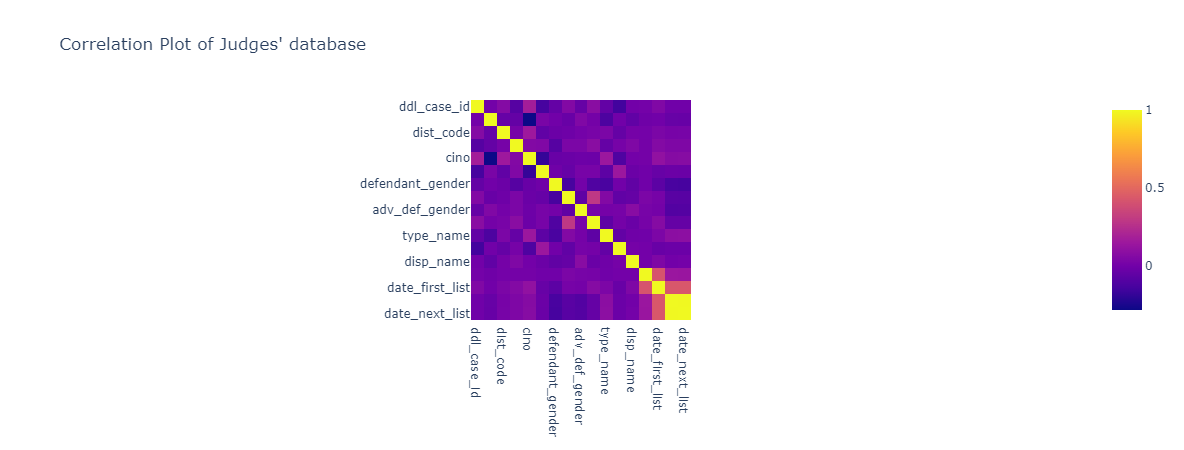

In [105]:
px.imshow(df.corr(),title="Correlation Plot of Judges' database", text_auto=True)

- `date_next_list` and `date_last_list` are extremely correlated, we suspect that this is because the last time the `next` date was the `last` date filled.
- `date_first_list` is also positively correlated with `date_next_list` and `date_last_list`. This might be happening since 
- `date_first_list` and `date_of_filing` are also decently correlated, that might be because 
- A bunch of pairs of genders (e.g.: `adv_pet_gender` and `pertitioner_gender`) also have a correlation value of >$0.25$ 

### Defining a function to preprocess cases_csv file

#### Converting a `state_code` to it's string values using the `cases_state_key.csv` file

In [106]:
def state_name_convert(df):
    df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "cases_state_key.csv"),
                                usecols = ['year','state_code', 'state_name'])
    df_merge['state_code'] = df_merge['state_code'].astype('string')
    df = df.merge(df_merge, on=['year', 'state_code'])
    return df

#### Converting a `purpose_name` to their it's string value using the `purpose_name_key.csv` file

In [107]:
def purpose_name_convert(df):
    df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "purpose_name_key.csv"),
                              usecols=['year', 'purpose_name', 'purpose_name_s'])
    df = df.merge(df_merge, on=['year', 'purpose_name'])
    return df

#### Converting a `disp_name` to it's string value using the `disp_name_key.csv` file

In [108]:
def disp_name_convert(df):
    df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "disp_name_key.csv"),
                              usecols=['year', 'disp_name', 'disp_name_s'])
    df = df.merge(df_merge, on=['year', 'disp_name'])
    return df

#### Converting a `type_name` to it's string value using the `type_name_key.csv` file

In [109]:
def type_name_convert(df):
    df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "type_name_key.csv"),
                              usecols=['year', 'type_name', 'type_name_s'])
    df = df.merge(df_merge, on=['year', 'type_name'])
    return df

#### Converting a `dist_code` to it's string value using `cases_district_key.csv` file

In [110]:
def dist_name_convert(df):
    df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "cases_district_key.csv"),
                                usecols = ['state_code', 'dist_code', 'district_name'])
    df_merge['state_code'] = df_merge['state_code'].astype('string')
    df_merge['dist_code'] = df_merge['dist_code'].astype('string')
    df = df.merge(df_merge, on=['state_code', 'dist_code'])
    return df

#### Getting string values of `court` related columns using the `cases_court_key.csv` file

In [111]:
def case_court_convert(df):
    df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "cases_court_key.csv"),
                                usecols = ['year', 'state_code', 'dist_code', 'court_no', 'court_name'])
    df_merge['state_code'] = df_merge['state_code'].astype('string')
    df_merge['dist_code'] = df_merge['dist_code'].astype('string')
    df_merge['court_no'] = df_merge['court_no'].astype('string')
    df = df.merge(df_merge, on=['year', 'state_code', 'dist_code', 'court_no'])
    return df

### Merging the functions declared above into a function that can be used to return a cleaned version of case_csv 
- The `test_mode` parameter (<em> defaults to `False` </em>) can be set `True` to obtain the first 10000 rows of a `case_{year}.csv` file. This was added to speed up testing where all columns aren't needed/
- The `to_unlabel` parameter (<em> defaults to `False` </em>) can be set `True` to obtain the stringified version of the `case_{year}.csv` file. This was added to improve flexibilty.
- The `year` parameter is used to fetch the `case_{year}.csv` file of a particular year, it adds flexibility and is a more pythonic way of doing things.

In [112]:
def preprocessing_case_csv(year, test_mode=False, to_unlabel=False):
    
    ## If the function is called in test_mode, we will only take the top 10000 rows
    if not test_mode:
        df = pd.read_csv(os.path.join(CASES_CSV_FOLDER, f"cases_{year}.csv"))
    else:
        df = pd.read_csv(os.path.join(CASES_CSV_FOLDER, f"cases_{year}.csv"), nrows=10000)
   
    ## String-type column types are cleaned 
    df = str_dtypes_preprocess(df, str_column_list)
    
    ## Gender-related column types are cleaned
    df = gender_dtypes_preprocess(df)
    
    ## Date-related column types are cleaned
    df = date_dtype_preprocess(df, date_column_list)

    if to_unlabel:
        ### Joining states
        df = state_name_convert(df)
        
        ### Joining purpose names
        df = purpose_name_convert(df)
        
        ### Joining disposition names
        df = disp_name_convert(df)
        
        ### Joining type names
        df = type_name_convert(df)
        
        ### Joining districts
        df = dist_name_convert(df)
        
        ### Joining court names
        df = case_court_convert(df)
        
        ### Removing extraneous columns
        df = df.drop(columns=['cino', 
                              'state_code', 'dist_code', 
                              'court_no', 'purpose_name', 
                              'type_name', 'disp_name'])
    return df

### Number of cases filed each day

We must look at how the number of filed cases changes over different time frames.<br>
We run a loop to go through every year, and make a Series/Dataframe which can then be plotted. <br>

In [ ]:
df = None

In [ ]:
plot_list = []
pending_cases_list = []

fig, ax = plt.subplots(figsize=(21,6))


for year in range(2010,2019):
    df = preprocessing_case_csv(year)

    freq_filed_cases = df['date_of_filing']\
                            .value_counts()\
                            .asfreq('D', fill_value=0)
    
    df_filed_cases = freq_filed_cases\
                            .to_frame()\
                            .reset_index()\
                            .rename(columns={'index' : 'date', 'date_of_filing': 'num_filed_cases'})
            
    df_filed_cases['weekday'] = df_filed_cases['date'] \
                                            .dt.day_name()

    weekwise_filed_cases = df_filed_cases.weekday.value_counts()
    
    ax.plot(df_filed_cases['date'], df_filed_cases['num_filed_cases'], label=str(year))
    ax.set_xlim("01-01-2010", "01-01-2019")

In [ ]:
fig = px.histogram(df, x="disp_name")

In [ ]:
fig.show()

# Insight #1
## Analyzing criminal cases that get dismissed

A dismission is the disposition of a case when there isn't enough evidence for the case to continue, states with higher number of dismissed cases means that the judicial setup of that state is not competent enough and might suggest some form of corruption

## Stages in the insight gathering attempt:
- Firstly, we will explore how we will generate the insights and look at interesting visualization strategies, this part strongly resembles the EDA stage of our data analysis done before.
- Secondly, we will standardize the stuff that was done in the first step. The ideas explored will be made into functions and then we can run a loop and look at the time-variance of these insights YoY. 

## Stage #1


### Merging appropriate dataframes 

We will start off by loading `cases_{year}.csv` here, for testing purposes let's try this with `case_2014.csv`. Then, we will merge the`criminal` column from `acts_sections.csv`.

In [ ]:
df = preprocessing_case_csv(year=2014, to_unlabel=True)
df = df.merge(df_acts_sections, on=['ddl_case_id'])

df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "act_key.csv"),
                      usecols=['act', 'act_s'])
df = df.merge(df_merge, on='act')

df.head(10)

In [ ]:
df = df.drop(columns = ['date_of_decision'])
df = df.dropna()

### Checking how quickly each state responds to a criminal case being filed
We can check this by finding the number of days between `date_first_list` and `date_of_filing`.

In [ ]:
df['date_first_list'] = pd.to_datetime(
    df['date_first_list'], errors='coerce'
).dt.date
df["quickness_of_action"] = ((df.date_first_list - df.date_of_filing)/np.timedelta64(1, 'D')).astype(int)

### Filtering out non-criminal cases
We can filter out non-criminal cases by checking if the value in the `criminal` column of our df is $1$ or not.<br>
However, for readabiltiy, we will convert the column dtype to `bool` and then check if the corresponding value is `True`.

In [ ]:
df.criminal = df.criminal.astype('bool')
df.criminal.value_counts()

In [ ]:
df = df[(df.criminal == True)]

Let's also drop the `ddl_case_id` and `cino` columns since they are unique identifiers mostly useful for connecting tables. These values are not needed any more

In [ ]:
df = df.drop(columns=['ddl_case_id', 'act'])

In [ ]:
df.info()

### Making a Series/Dataframe by aggregating mean `quickness_of_action` by the `state_name` column.

This gives us the statewise time taken for a case to get its first hearing date from the day of filing.

In [ ]:
avg_quickness_states = df.groupby(['state_name'])['quickness_of_action'].mean()
avg_quickness_states.sort_values(ascending=False)
time_taken_states = avg_quickness_states.to_frame()
time_taken_states = time_taken_states.reset_index()
time_taken_states.head(10)

### Plotting obtained Dataframe

In [ ]:
px.line(time_taken_states, x='state_name', y='quickness_of_action', title="Amount of time (in days) taken by each state to hear a criminal case after filing")

A line plot won't help us in visualizing the data properly. A better way of visualizing data that is identified by a `Geographical identifier` is using `Choropleths`. These are heat maps with the heatness values representing the value and the location of the heatmap is a Geographical map, which, in our case is of India, split by states.

### Cleaning the `time_taken_states` dataframe we have obtained to plot a more quality choropleth 

In [ ]:
### The `properties.ST_NM` property of the GeoJSON file has a few names that are written differently in the `state_name` column of our dataframe.
### We will replace these names in the dataframe with the ones in the GeoJSON
time_taken_states = time_taken_states.replace(
            ['Jammu and Kashmir', 'Orissa', 'DNH at Silvasa', 'Diu and Daman'],
            ['Jammu & Kashmir', 'Odisha', "Dadra and Nagar Haveli and Daman and Diu", "Dadra and Nagar Haveli and Daman and Diu"]
        )

### Moreover, in the GeoJSON `Ladakh` has a separate area, so we will fill it with the values in Jammu and Kashmir
val = time_taken_states[time_taken_states['state_name']=='Jammu & Kashmir'].values[0][1]
time_taken_states = time_taken_states.append({
    'state_name' : 'Ladakh',
    'quickness_of_action' : val
}, ignore_index=True)

### Plotting the choropleth using `px.choropleth`

In [ ]:
px.choropleth(
    time_taken_states,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='state_name',
    color='quickness_of_action',
    color_continuous_scale='Reds',
    fitbounds="locations"
)

## Insights from the state-wise analysis of data on 2014
- It looks like South India reacts quickly to criminal cases being filed.
- The Northern-Eastern part of India seems to be quite slow, especially **West Bengal** being the slowest pan India
- This seems to imply that a in states that even in a (relatively) quick-to-respond it usually takes around 3 weeks to hear the case.
- In states that are more lousy it takes around 8-10 months to process a criminal case.
- These legal practitioners to have a better estimate of when their clients might get their caes heard.
- Moreover, such insights can help the State and Central Governments to collect data on the Judicial system of a state as a whole.
- It can also help a State Government make amends to their judicial process and/or look at what other states have done to improve. 

We can now plot the `quickness_of_action` it districtwise.

In [ ]:
avg_quickness_district = df.groupby(['district_name'])['quickness_of_action'].mean()
avg_quickness_district = avg_quickness_district.to_frame()
avg_quickness_district = avg_quickness_district.reset_index()

# avg_quickness_district = avg_quickness_district[avg_quickness_district.quickness_of_action > 1000]
avg_quickness_district.head(10)

In [ ]:
px.choropleth(
    avg_quickness_district,
    geojson="https://raw.githubusercontent.com/geohacker/india/master/district/india_district.geojson",
    featureidkey='properties.NAME_2',
    locations='district_name',
    color='quickness_of_action',
    fitbounds="locations",
    color_continuous_scale='Viridis',
    title='District-wise criminal case hearing wait time',
)

## Insights from the district-wise `quickness_of_action` study on cases in 2014
- It looks like most districts have an average value close to their state-mean.
- This implies that most courts in a state will follow what other courts in the state are doing.
- Since District Courts come under the High Court of the State, and so a sloppy State will have sloppy District Court proceedings in general, and a quick State will have a quick District Court.
- We can also notice that there are a few outliers like `West Khasi Hills` with an average of ~$1900$ days or 5-6 years!!
- However these outliers are very very sparse, and in most cases the cases will take around 3-5 weeks before being heard.
- If a district is even slightly noticable in the heatmap, it takes ~$1000$ days or a whopping 3 years to hear such a case.
- This plot can help identify the slowpokes in a state and the High Court of the corresponding state can then take a closer look at what's going on in that particular district.
- Moreover, this might also allow legal practioners to get a better estimate on how much time it will take before they will get a case heard, it will useful for them to have some idea.

```
NOTE : A few districts are shown as blank since there is a mismatch in MANY names between the district names in the GeoJSON file and the district names that are given in the file
```

Since the above visualizations will tell us all about the quickness of action in every state, we should also look at what are the most common dispositions in each state, and overall

### Making a frequency table of each disposition and cleaning it (like we did in the section before this) for the choropleth

In [ ]:
df.head()

In [ ]:
disp_freq_state_wise = (df.groupby(['year', 'disp_name_s'])['state_name'].value_counts()).to_frame()
disp_freq_state_wise.columns = ['count']
disp_freq_state_wise = disp_freq_state_wise.reset_index()
disp_freq_state_wise['state_name'] = disp_freq_state_wise['state_name'].replace(
            ['Jammu and Kashmir', 'Orissa', 'DNH at Silvasa', 'Diu and Daman'],
            ['Jammu & Kashmir', 'Odisha', "Dadra and Nagar Haveli and Daman and Diu", "Dadra and Nagar Haveli and Daman and Diu"]
        )

val = disp_freq_state_wise[disp_freq_state_wise['state_name']=='Jammu & Kashmir'].values
for entry in val:
    disp_freq_state_wise = disp_freq_state_wise.append({
        'state_name' : 'Ladakh',
        'disp_name_s' : entry[1],
        'year' : entry[0],
        'count': entry[3]
    }, ignore_index=True)

disp_freq_state_wise.head(10)

We will add animation sliders to view every disposition state by state

In [ ]:
px.choropleth(
    disp_freq_state_wise,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='state_name',
    color='count',
    animation_frame='disp_name_s',
    fitbounds="locations",
    color_continuous_scale='YlOrRd',
    title='Statewise criminal dispositions'
)

## Insights from the disposition ratio in each state
- States like Bihar and Karnataka have really high counts of allowed cases.
- It is worth noting how the Haryana, Punjab, Uttar Pradesh, Gujarat, Madhya Pradesh zone have very high allowed case counts, but every state around them has very low counts.
- Another such cluster is Karnataka and Tamil Nadu.
- South India seems to dominate in acquitting the cases.
- Madhya Pradesh has surprisingly large amounts of acquitted cases. 
- It is interesting to note how the count slowly dies down as we move from Madhya Pradhesh to Sourthern parts of India, whereas it suddenly drops beyond the Tropic of Cancer.
- Dismissions seem to clustered along the central longitude of the country, with a massive cluster 

### Analyzing district-wise to get clusters of dispositions across the map

In [ ]:
disp_freq_district_wise = (df.groupby(['year', 'disp_name_s'])['district_name'].value_counts()).to_frame()
disp_freq_district_wise.columns = ['count']
disp_freq_district_wise = disp_freq_district_wise.reset_index()

disp_freq_district_wise.head(10)

In [ ]:
px.choropleth(
    disp_freq_district_wise,
    geojson="https://raw.githubusercontent.com/geohacker/india/master/district/india_district.geojson",
    featureidkey='properties.NAME_2',
    locations='district_name',
    color='count',
    animation_frame='disp_name_s',
    fitbounds="locations",
    color_continuous_scale='Viridis',
    title='District-wise criminal dispositions',
)

In [ ]:
avg_quickness_states = None
avg_quickness_district = None
time_taken_states = None
disp_freq_district_wise = None

Since there are too many districts, it gets cumbersome to look at this data district by district, so we won't do it in the second stage of our insight

## Stage #2

### Standardizing everything as a function, and putting yearwise plots/series in lists that we will later access

In [76]:
glob_datas = []

colors_list = [
    "#808000",
    "#911eb4",
    "#9A6324",
    "#000000",
    "#000075",
    "#fabed4",
    "#aaffc3",
    "#dcbeff",
]

In [77]:
def clean_state_choropleth(choropleth_df):
    choropleth_df['state_name'] = choropleth_df['state_name'].replace(
                ['Jammu and Kashmir', 'Orissa', 'DNH at Silvasa', 'Diu and Daman'],
                ['Jammu & Kashmir', 'Odisha', "Dadra and Nagar Haveli and Daman and Diu", "Dadra and Nagar Haveli and Daman and Diu"]
            )

    val = choropleth_df[choropleth_df['state_name']=='Jammu & Kashmir']
    val['state_name'] = 'Ladakh'

    choropleth_df = choropleth_df.append(val, ignore_index=True).reset_index()

    return choropleth_df

In [78]:
def state_vs_time(df, year : int, col_to_aggr : str, col_to_plot : str, cols_to_group : list, method : str, glob_datas : list, line_plot_list=False, animation_column=None, choropleth_title = None):
    ### Rate of response study of criminal cases
    if method == 'value_counts':
        choropleth_title = str(choropleth_title)  
        grouped_data = df.groupby(cols_to_group)[str(col_to_aggr)].value_counts()
    elif method == 'mean':
        choropleth_title = str(choropleth_title)
        grouped_data = df.groupby(cols_to_group)[str(col_to_aggr)].mean()
    else:
        return 
    ### Save the series obtained
    framified_grouped_data = grouped_data.to_frame()
    grouped_data = None
    framified_grouped_data.columns = ['count']
    framified_grouped_data = framified_grouped_data.reset_index()

    ### Save the line plot
    if line_plot_list is True:
        data_to_add = px.line(framified_grouped_data, x='state_name', y='count').data
        data_to_add[0]['line']['color'] = colors_list[year - 2010]
        data_to_add[0]['name'] = str(year)

        if int(len(glob_datas)) > 0:
            glob_datas[0] += data_to_add
        else:
            glob_datas.append(data_to_add)

        data_to_add = None
    
    plot_state_choropleth(clean_state_choropleth(framified_grouped_data), col_to_plot, animation_column, choropleth_title)
    framified_grouped_data = None

In [79]:
def plot_state_choropleth(choropleth_df, col_to_plot, animation_column=None, title=None):
    ### Plot the choropleth
    fig = px.choropleth(
        choropleth_df,
        geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
        featureidkey='properties.ST_NM',
        locations='state_name',
        color=col_to_plot,
        animation_frame=animation_column,
        color_continuous_scale='Reds',
        fitbounds="locations",
        title=title
    )
    
    fig.show()
    
    fig = None

In [80]:
def preprocess_insight1_df(year):
    df = preprocessing_case_csv(year=year, to_unlabel=True)
    df = df.merge(df_acts_sections, on=['ddl_case_id'])
    
    df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "act_key.csv"),
                          usecols=['act', 'act_s'])
    df_merge = df_merge.dropna()
    df_merge['act'] = df_merge['act'].astype("int64")
    
    df = df.merge(df_merge, on='act')
    
    df_merge = None
    
    df = df.drop(columns = ['section', 'date_of_decision'])
    df = df.dropna()
    df['date_first_list'] = pd.to_datetime(
        df['date_first_list'], errors='coerce'
    ).dt.date
    df["quickness_of_action"] = ((df.date_first_list - df.date_of_filing)/np.timedelta64(1, 'D')).astype(int)

    df.criminal = df.criminal.astype('bool')
    
    df = df[(df.criminal == True)]
    df = df.drop(columns=['ddl_case_id', 'act'])
    
    return df

In [81]:
def insight_1(df, year : int):
    ### Make a dataframe of time taken between filing and hearing
    state_vs_time(df, year, 'quickness_of_action', 'count', ['state_name'], "mean", glob_datas, True, None,
                 "Statewise Disposition frquency for Criminal Cases in the year " + str(year))

    ### Statewise disposition choloropleth heat map
    state_vs_time(df, year, 'state_name', 'count', ['year', 'disp_name_s'], "value_counts", None, False, 'disp_name_s', 
                 "Statewise Response Time to Criminal Cases in the year " + str(year))

### Running a loop over all years

**NOTE:** This might take a while to run, since each case csv is massive and merging it with the huge 3gb acts_sections file is also painful

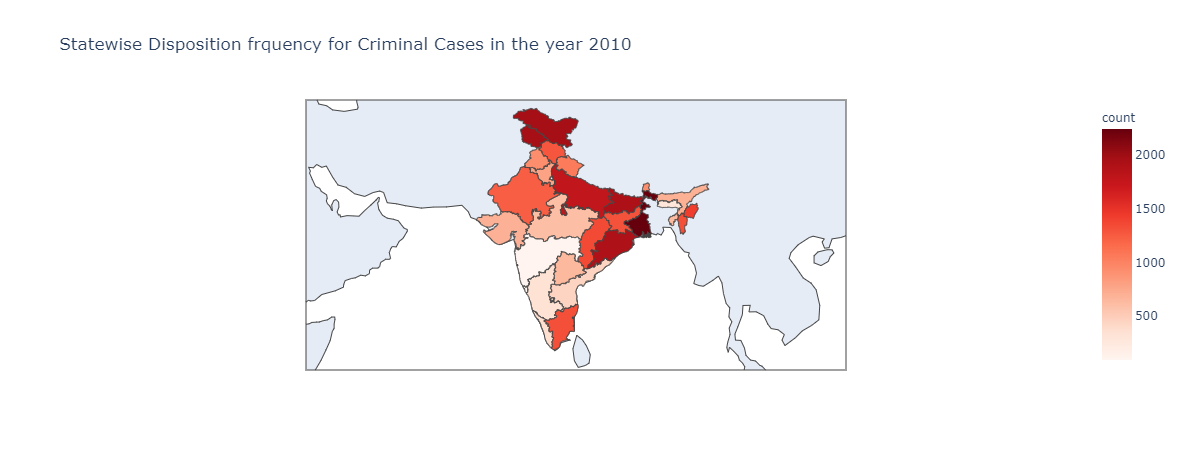

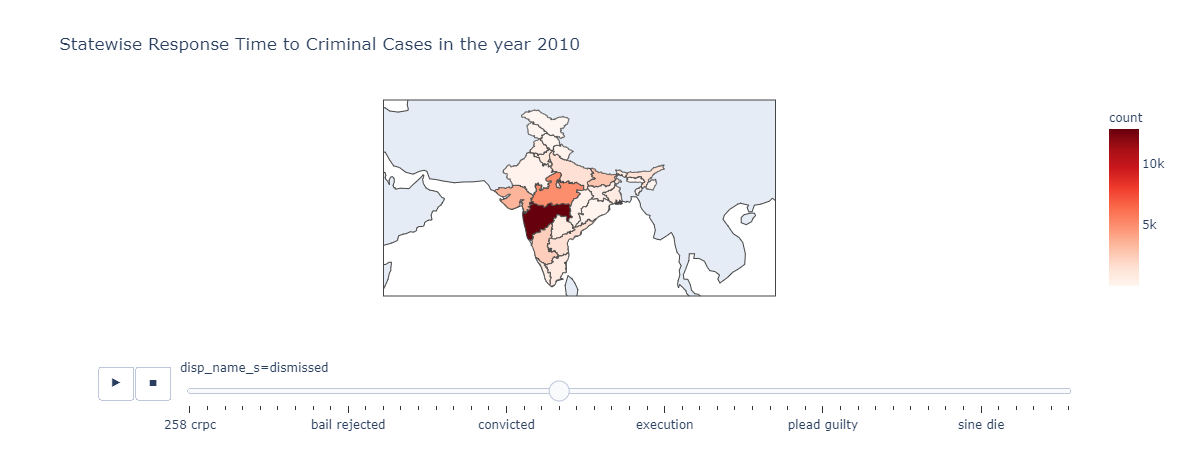

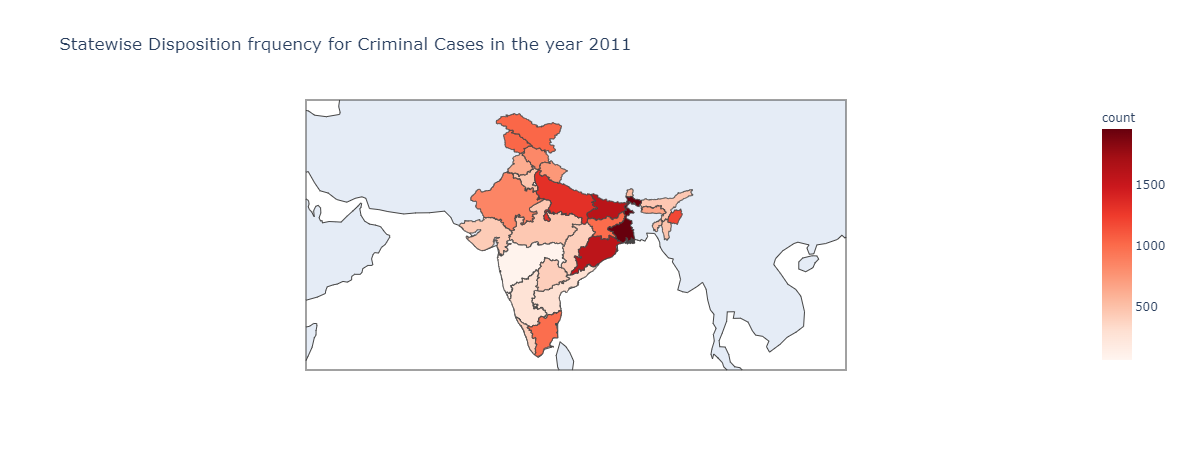

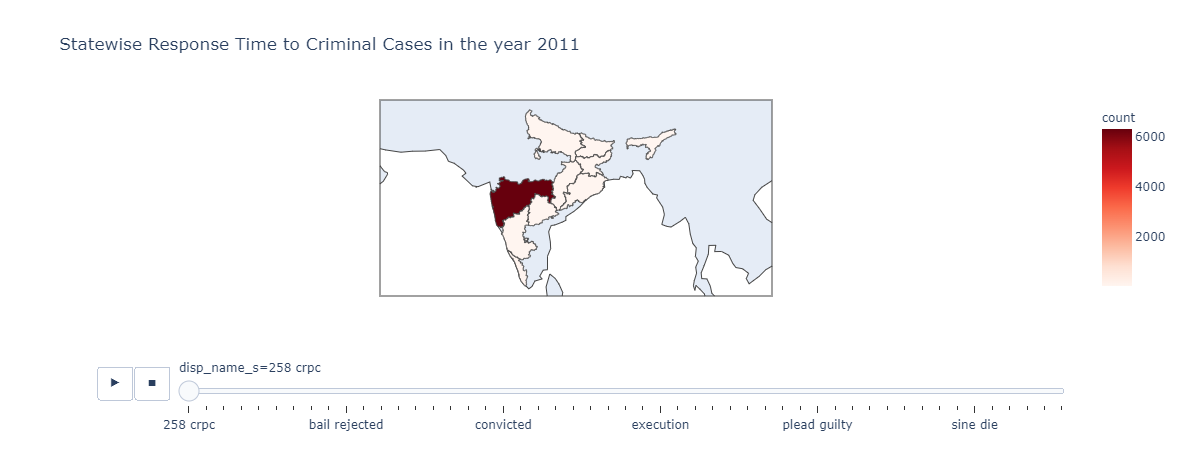

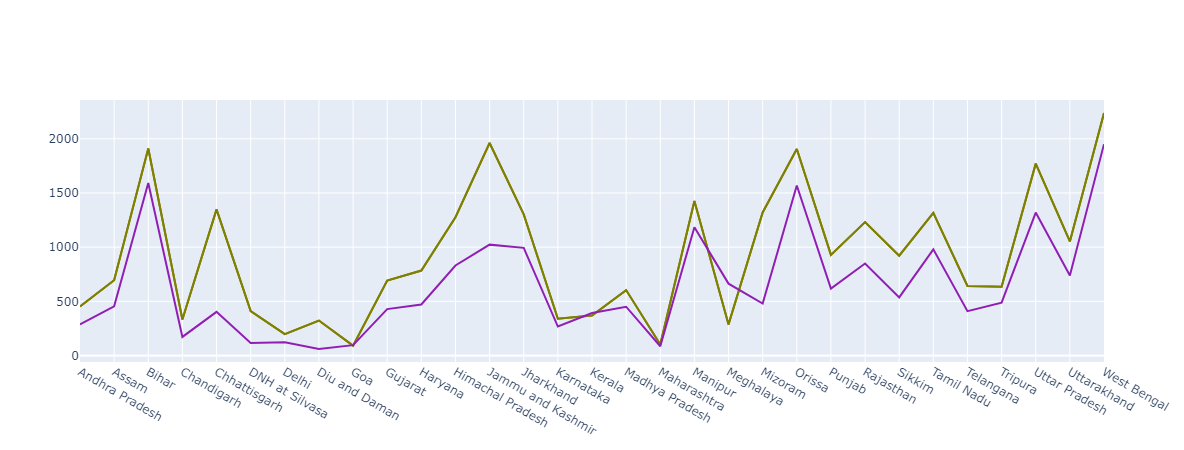

In [41]:
# for year in range(2010,2012):
#     df = preprocess_insight1_df(year)
#     insight_1(df, year)
#     df = None
# go.Figure(data=glob_datas[0])

Making a `fig_net` figure by merging data all across the `quickness_line_plots` list that we have

In [26]:
df = None

In [27]:
year = 2010
df = preprocess_insight1_df(year)

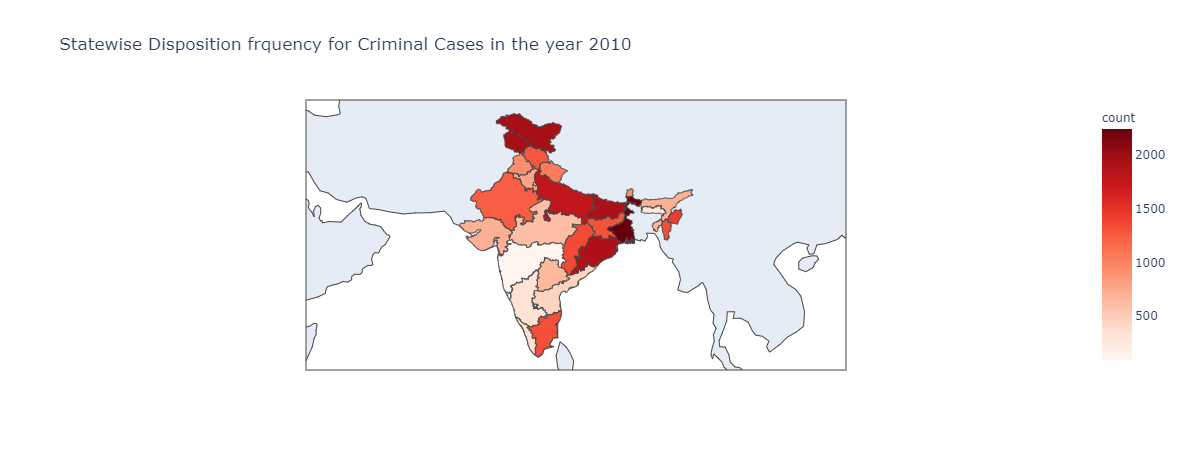

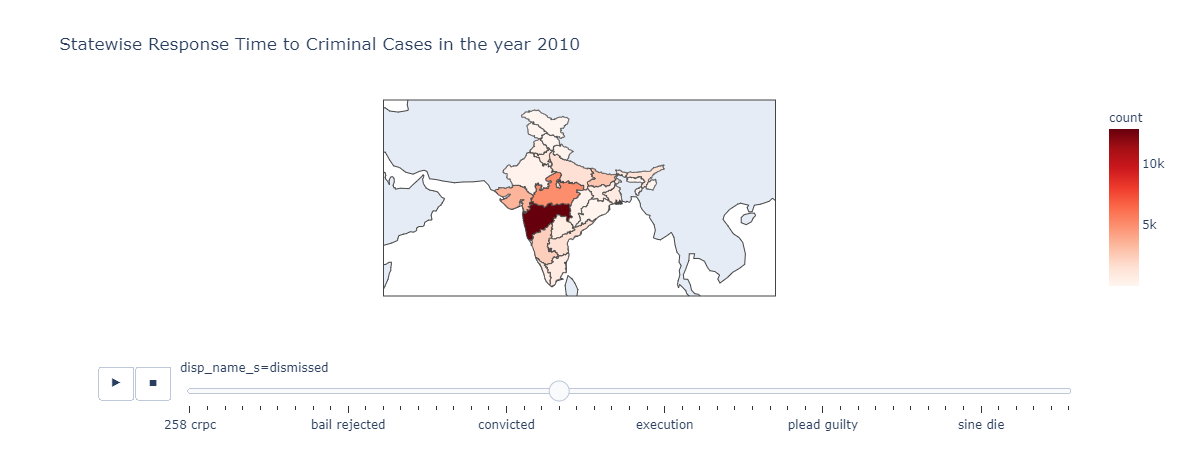

In [28]:
insight_1(df, year)
df = None

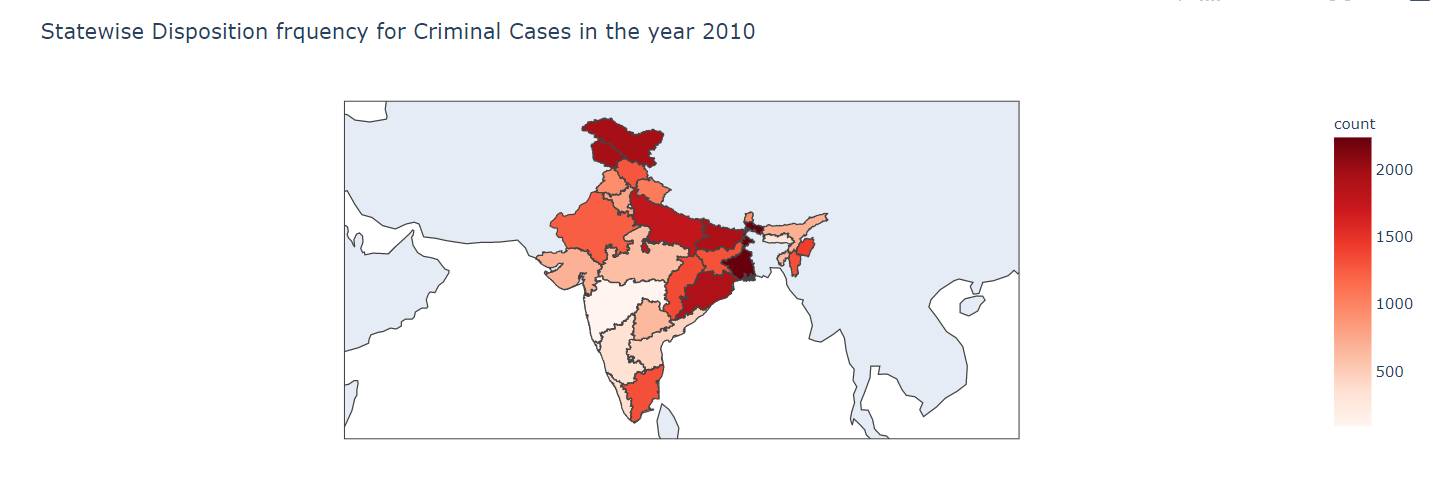
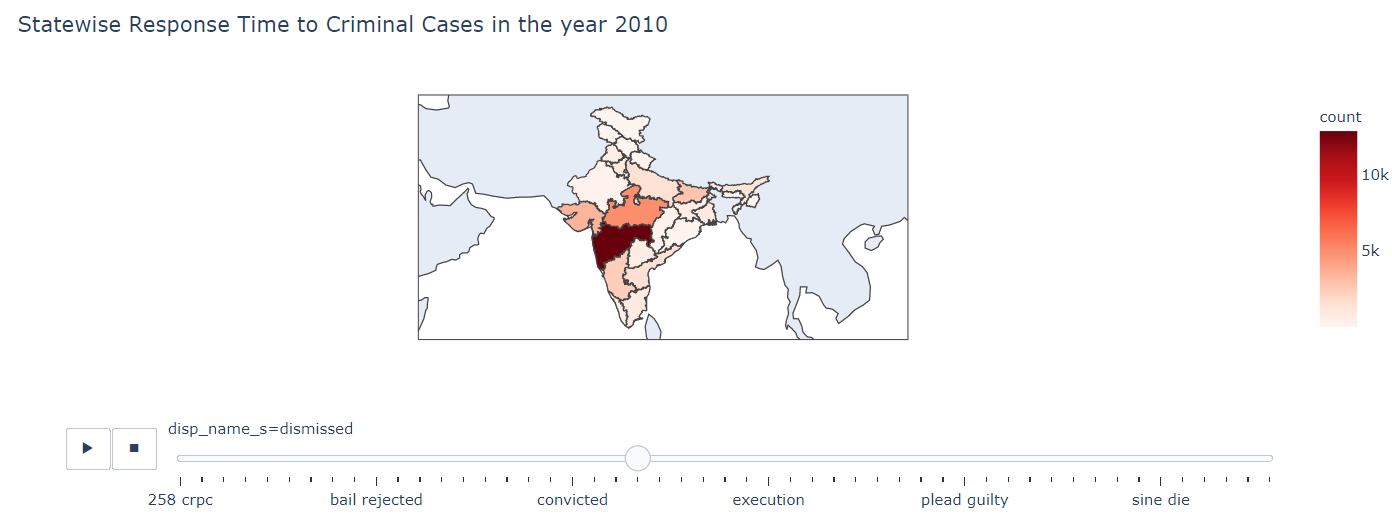

In [29]:
year = 2011
df = preprocess_insight1_df(year)

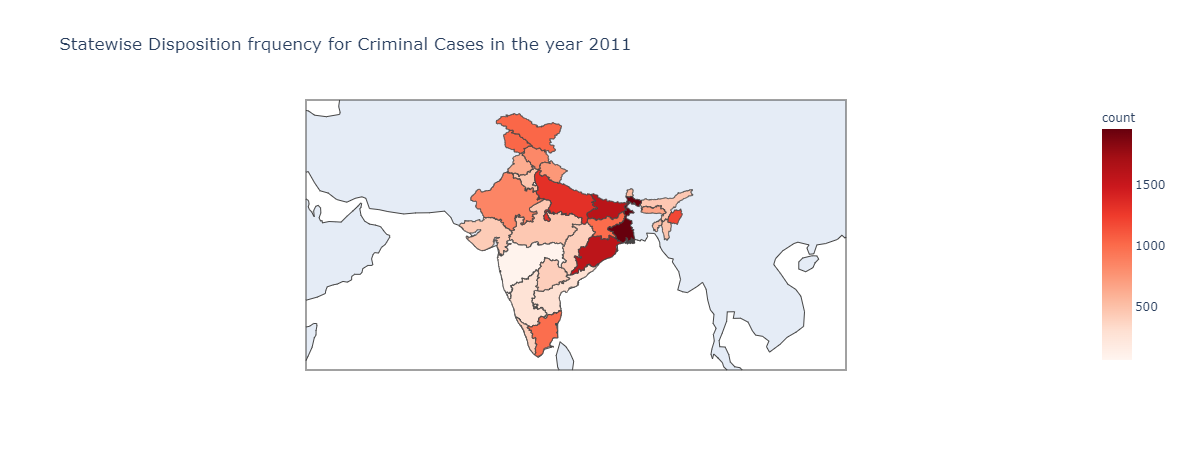

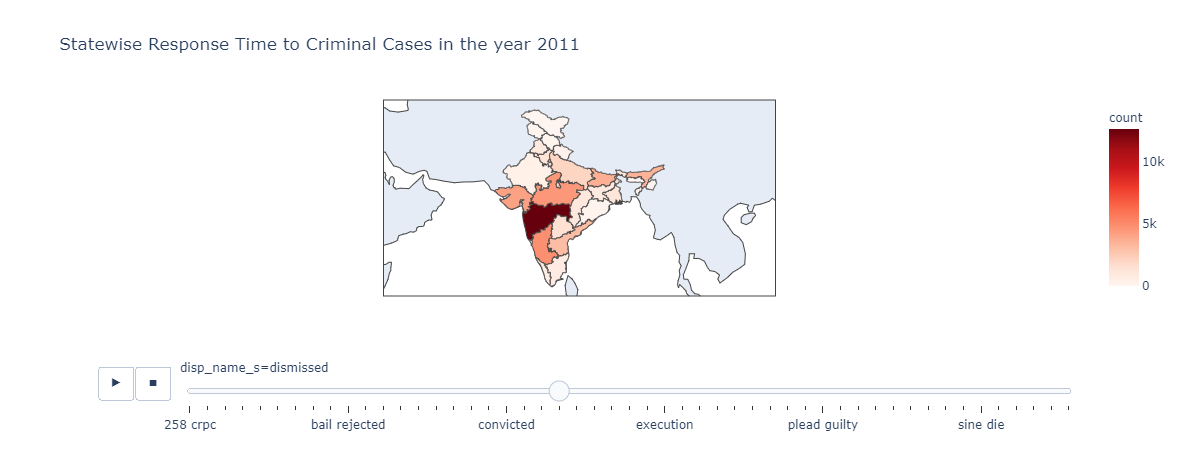

In [30]:
insight_1(df, year)
df = None

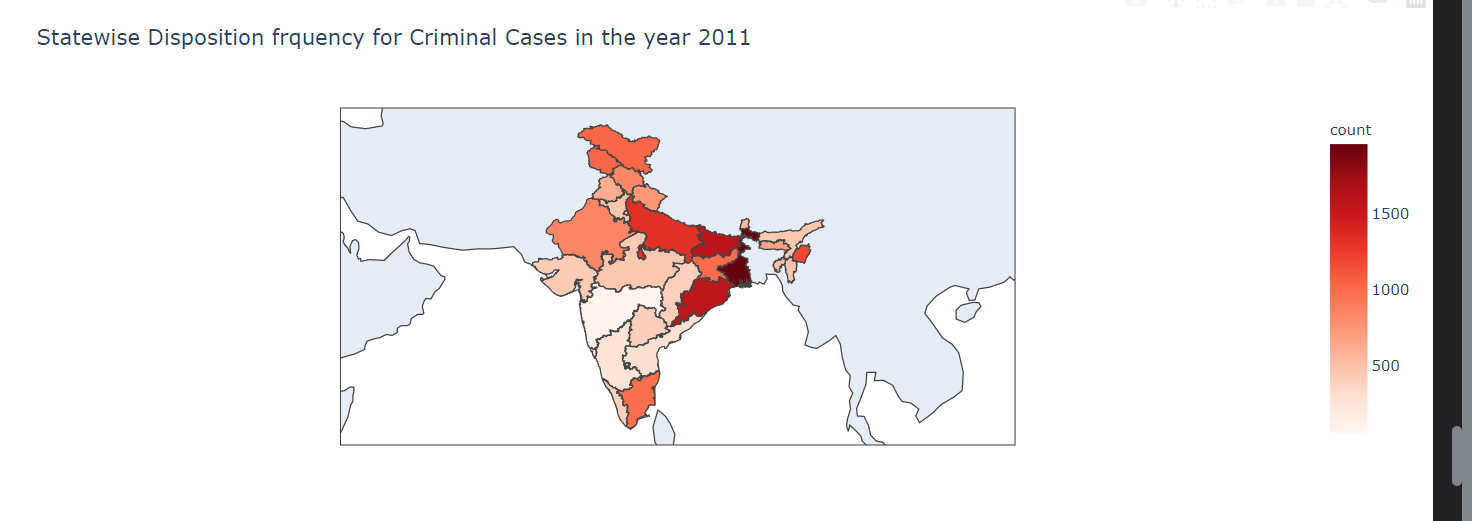
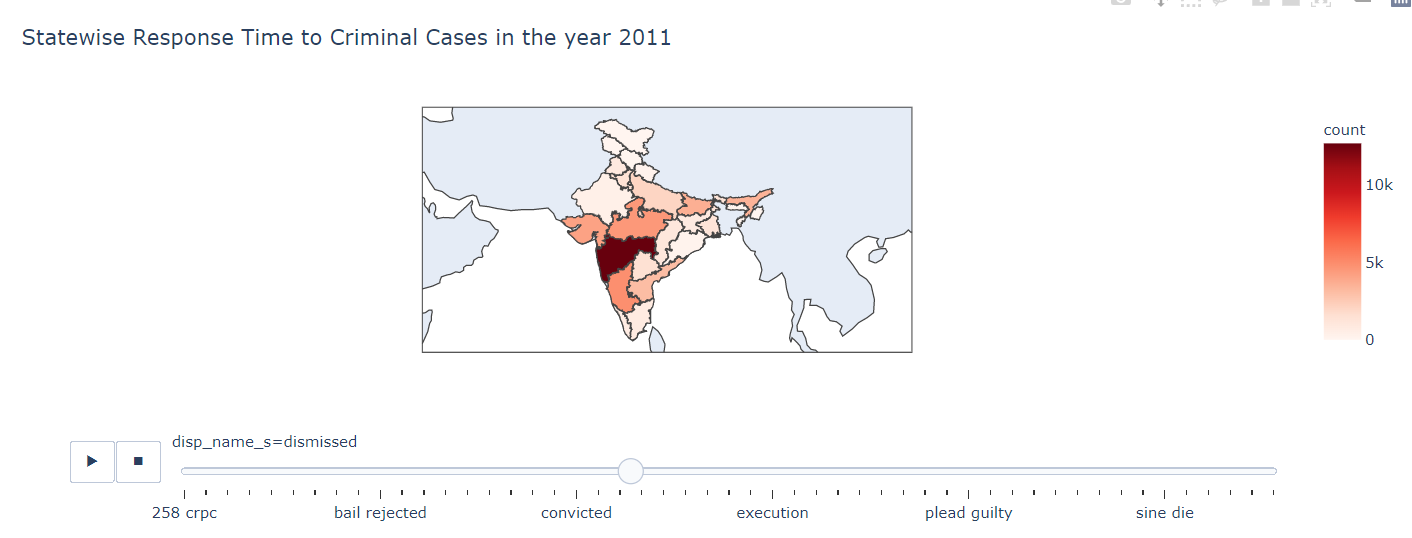

In [31]:
year = 2012
df = preprocess_insight1_df(year)

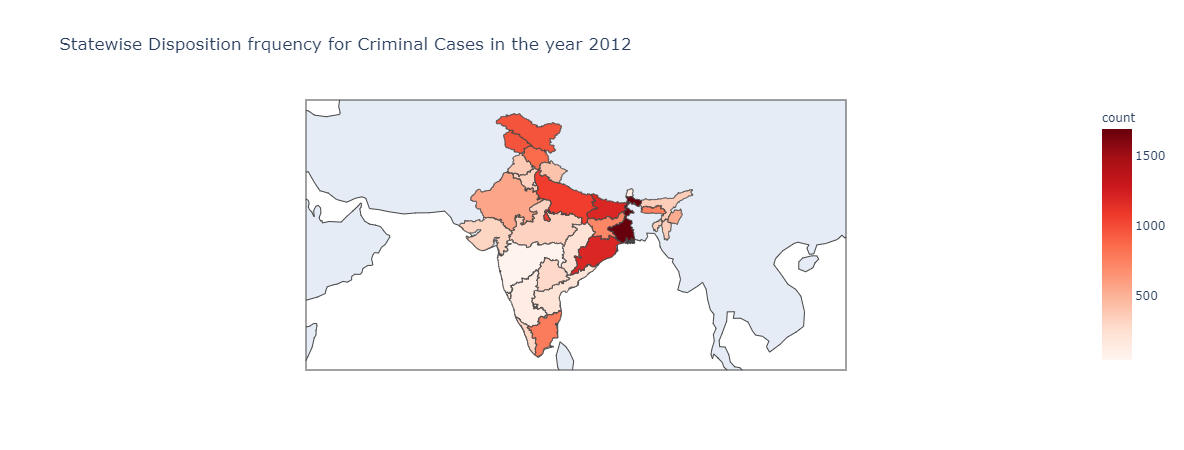

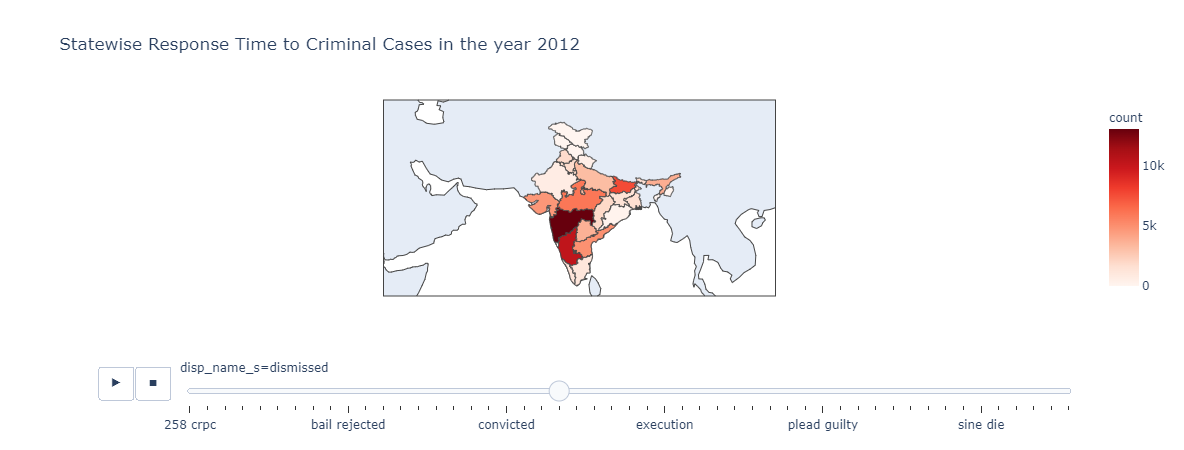

In [32]:
insight_1(df, year)
df = None

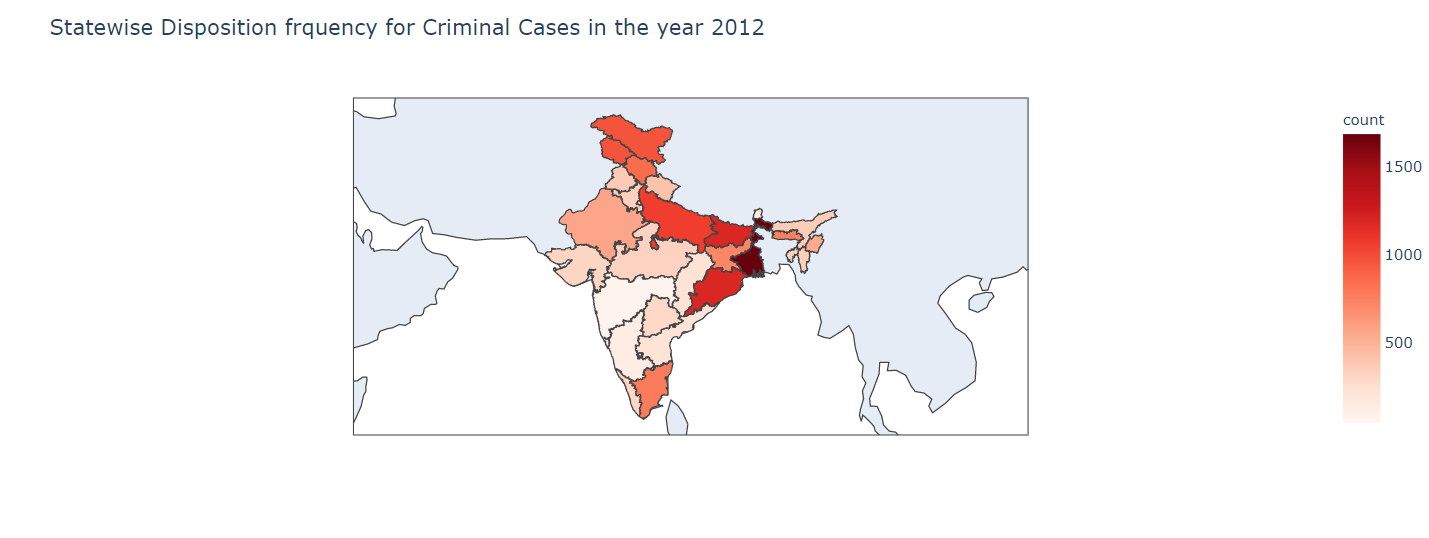
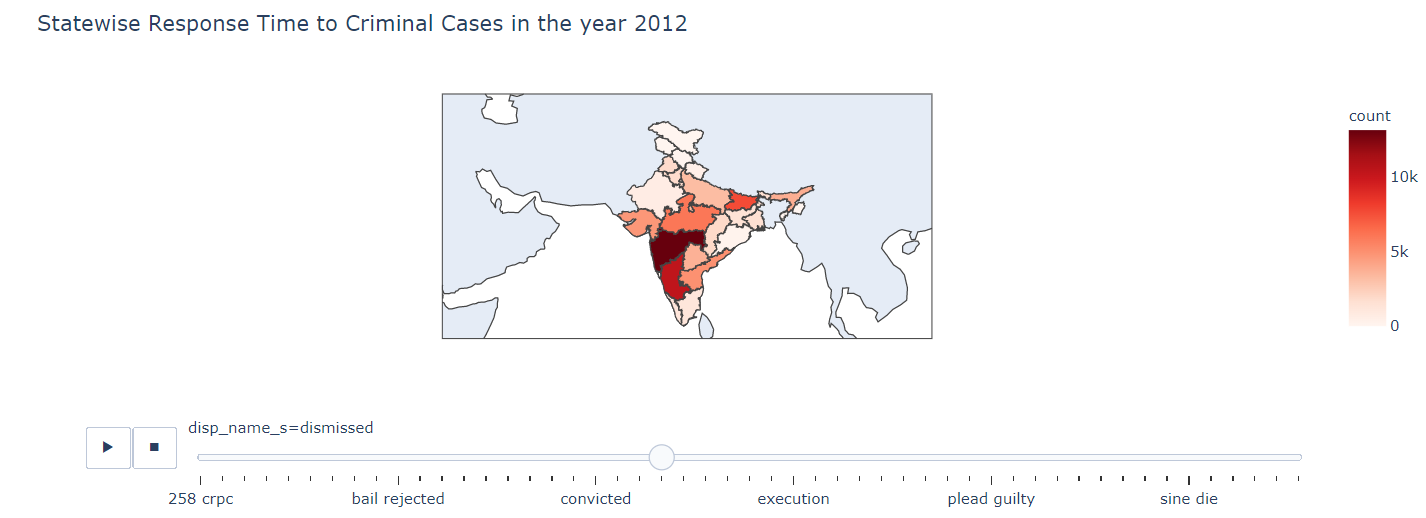

In [33]:
year = 2013
df = preprocess_insight1_df(year)

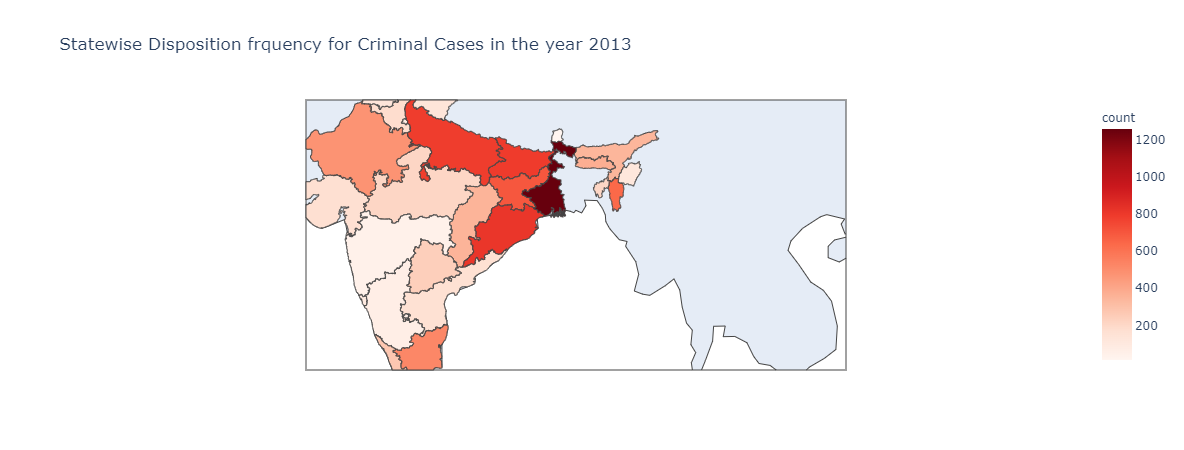

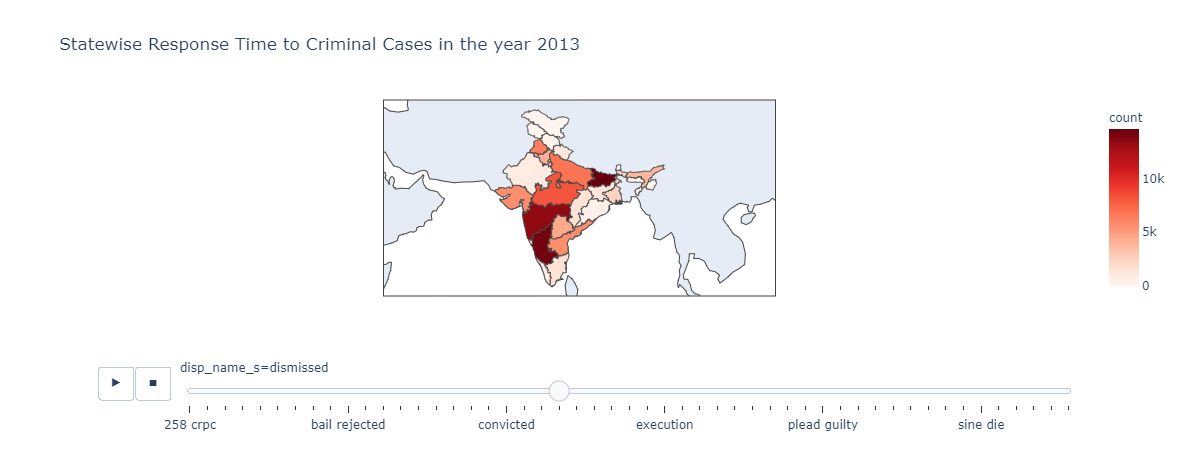

In [34]:
insight_1(df, year)
df = None

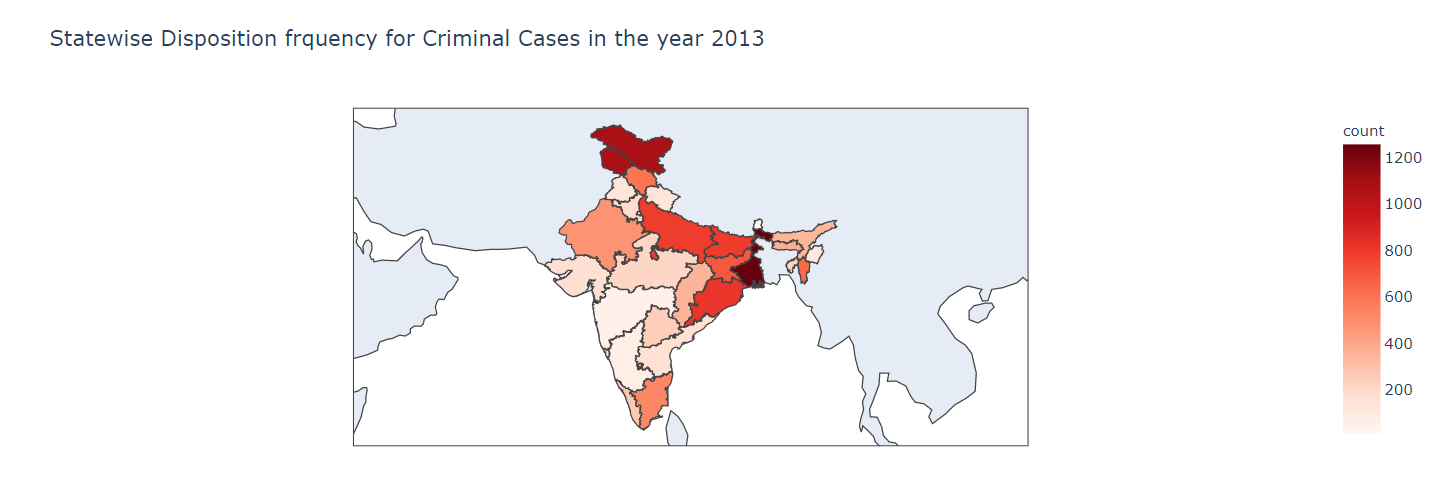
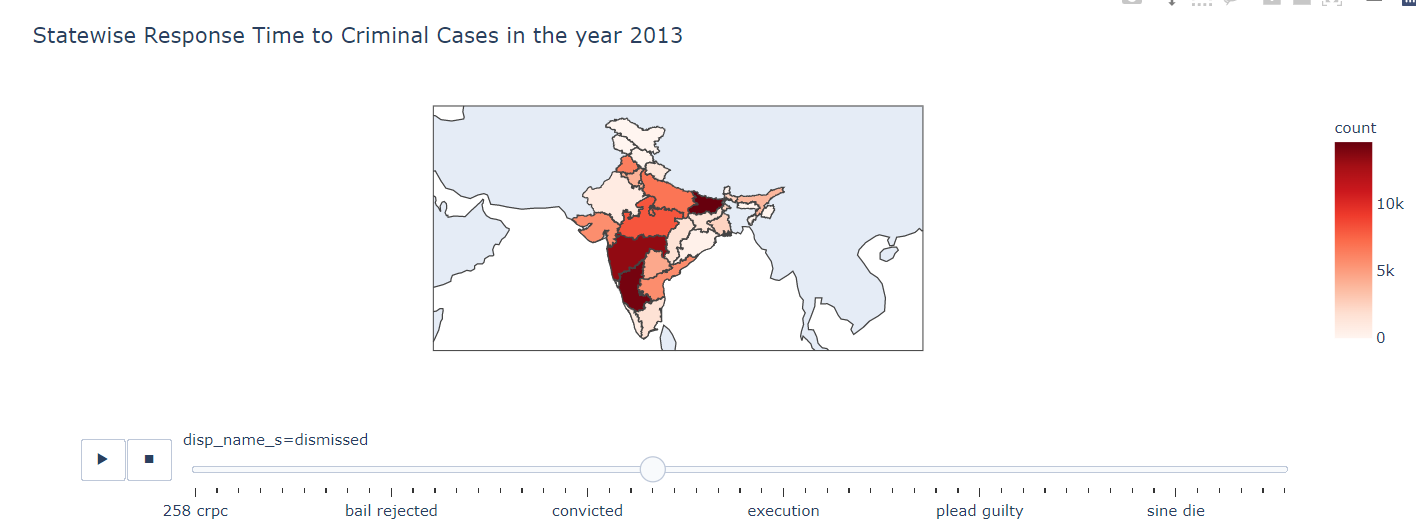

In [36]:
year = 2014
df = preprocess_insight1_df(year)

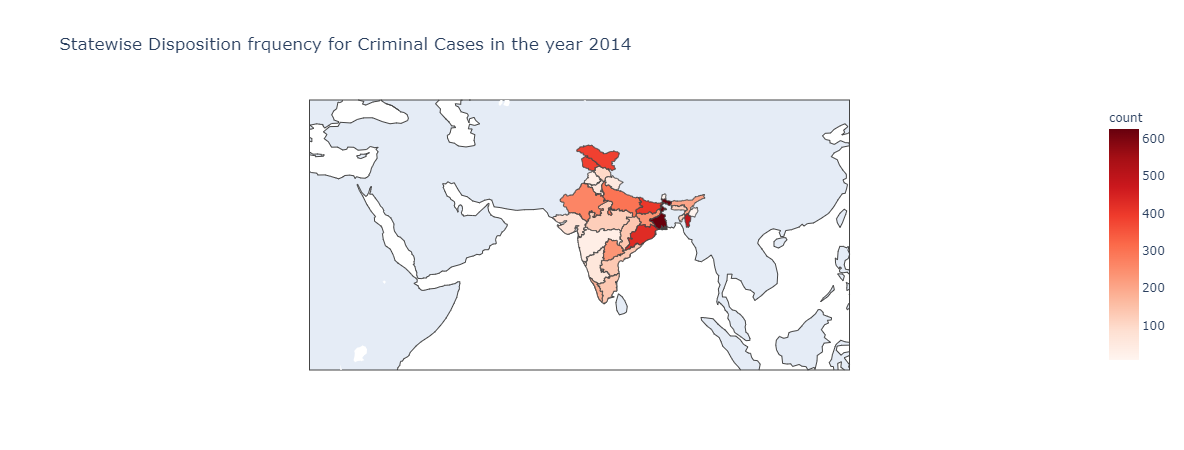

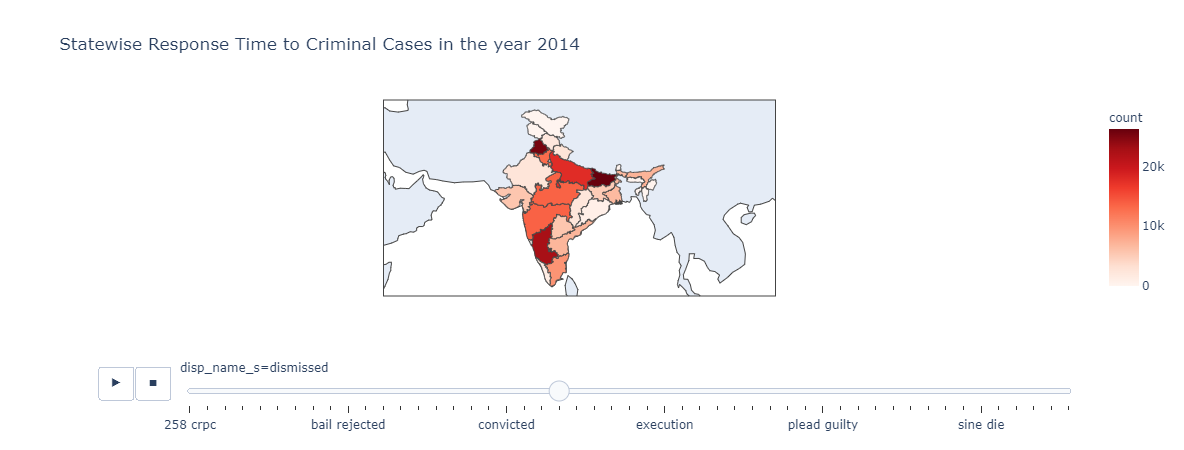

In [37]:
insight_1(df, year)
df = None

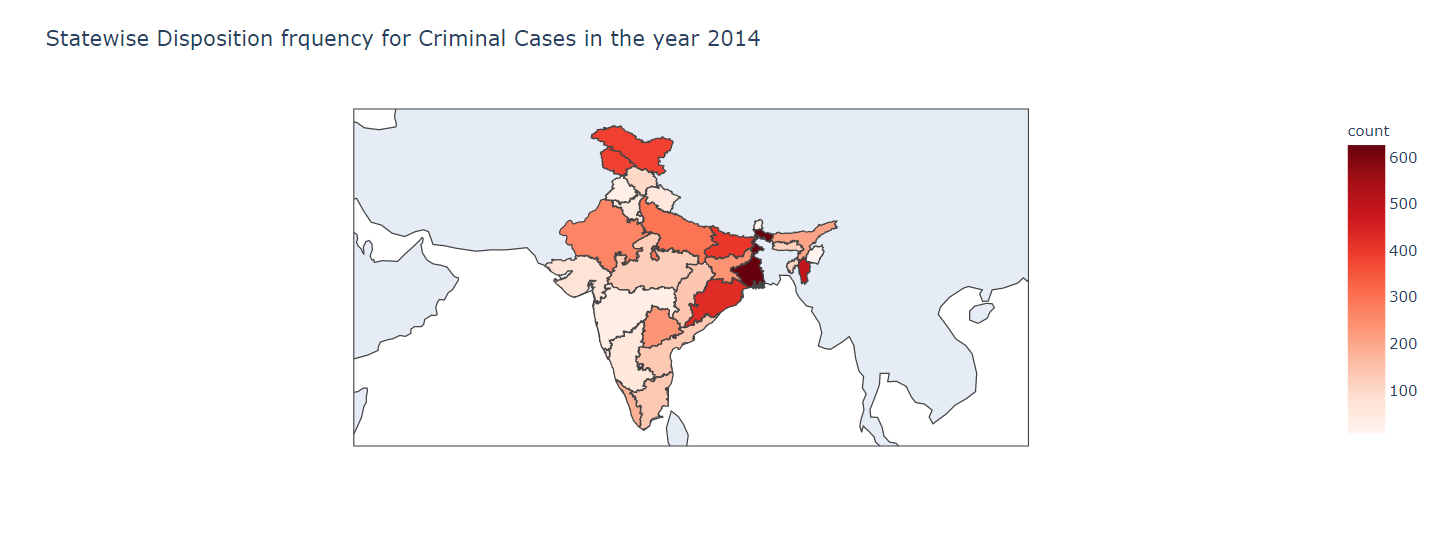
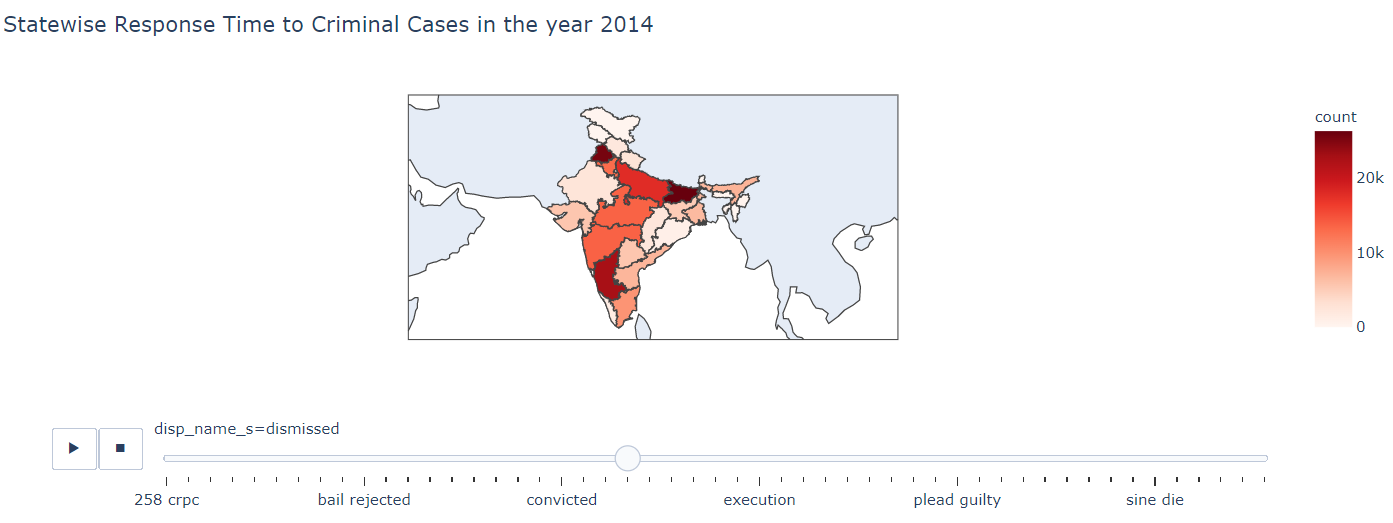

In [38]:
year = 2015
df = preprocess_insight1_df(year)

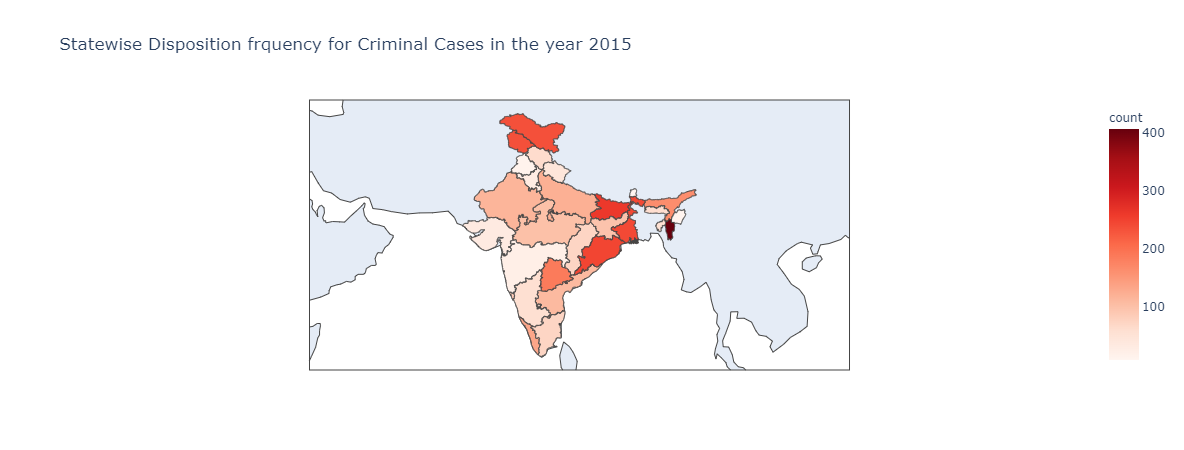

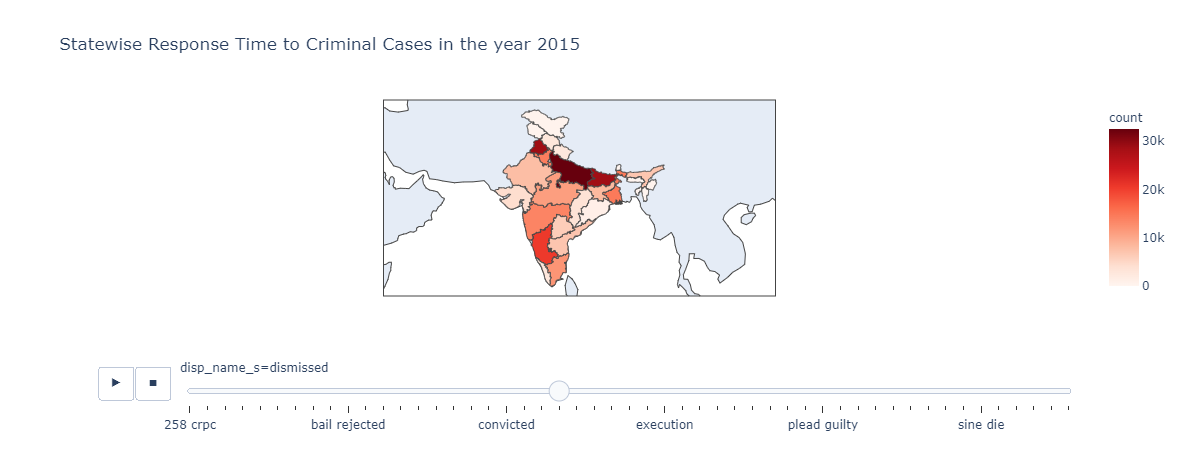

In [39]:
insight_1(df, year)
df = None

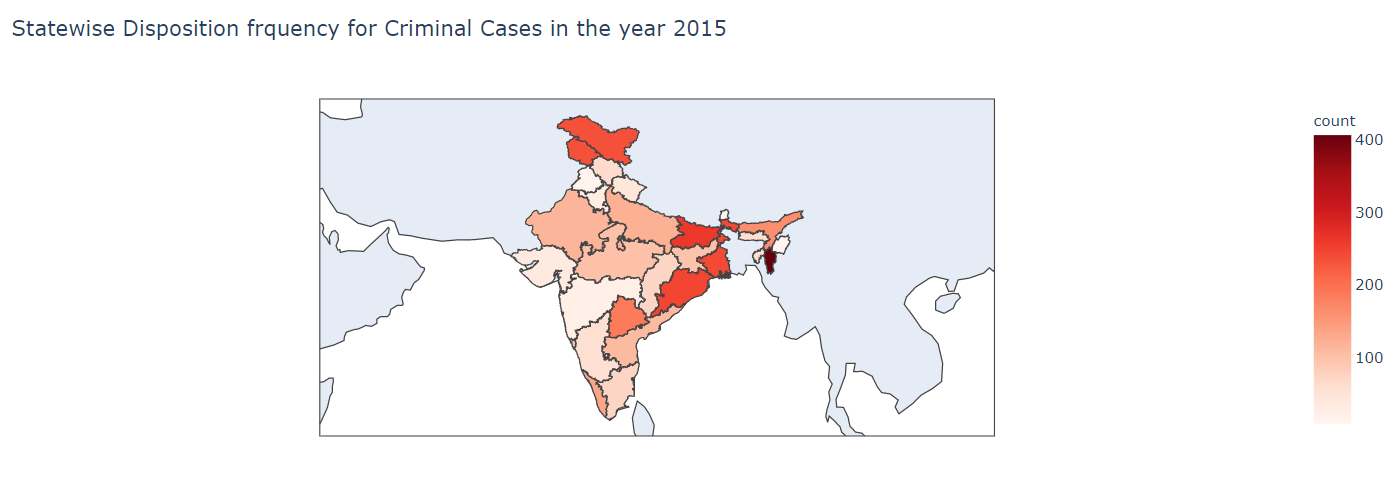
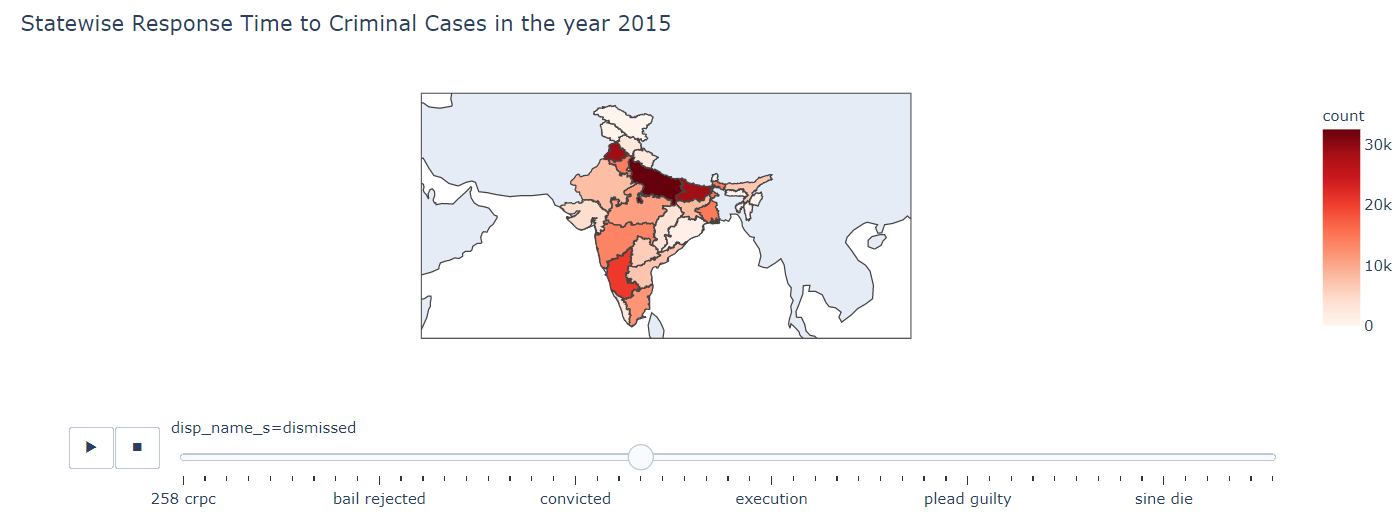

In [40]:
year = 2016
df = preprocess_insight1_df(year)

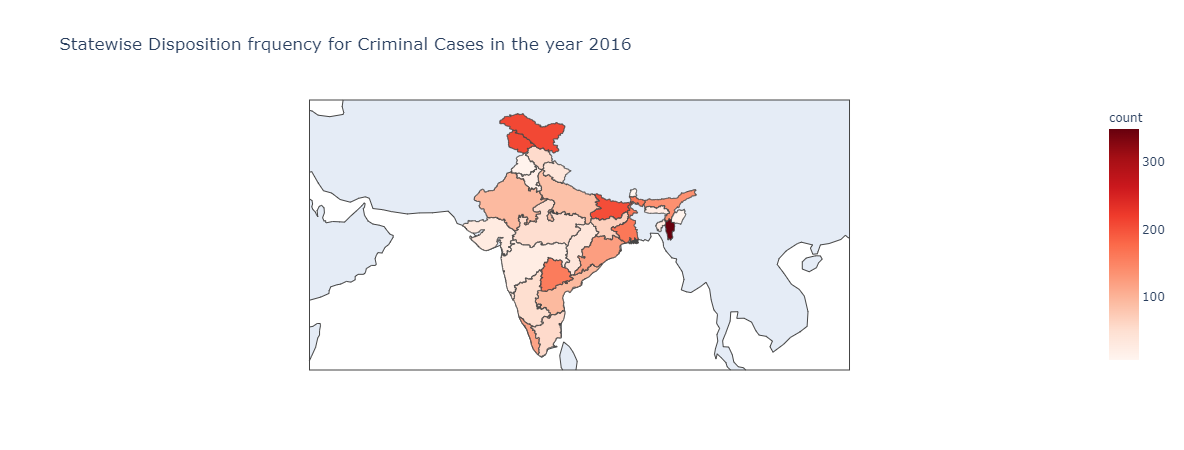

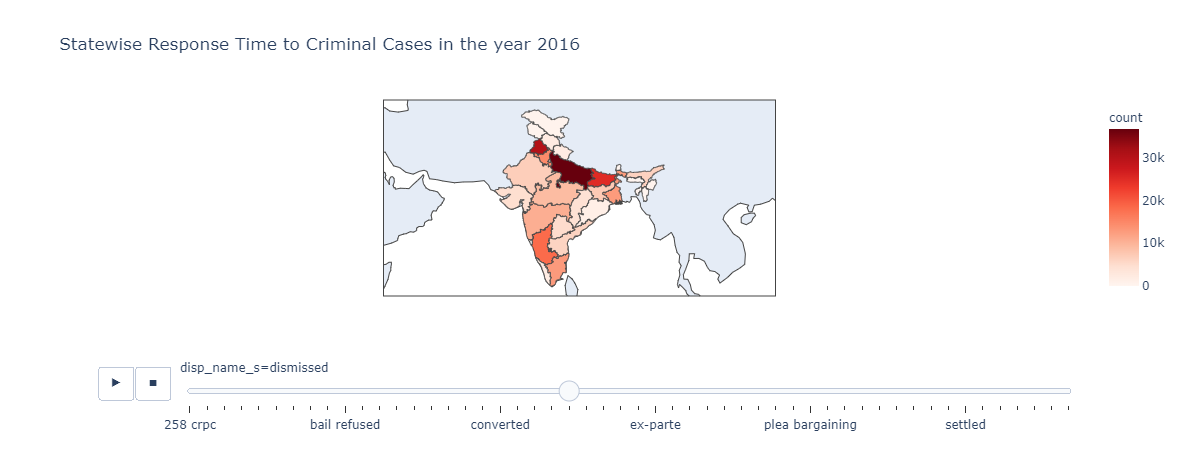

In [41]:
insight_1(df, year)
df = None

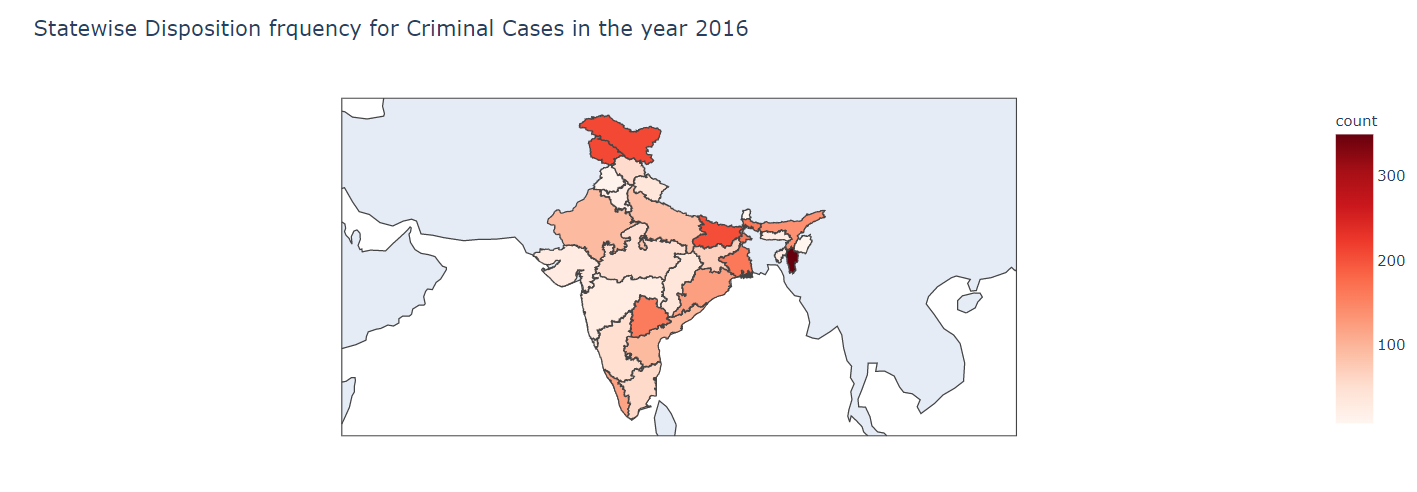
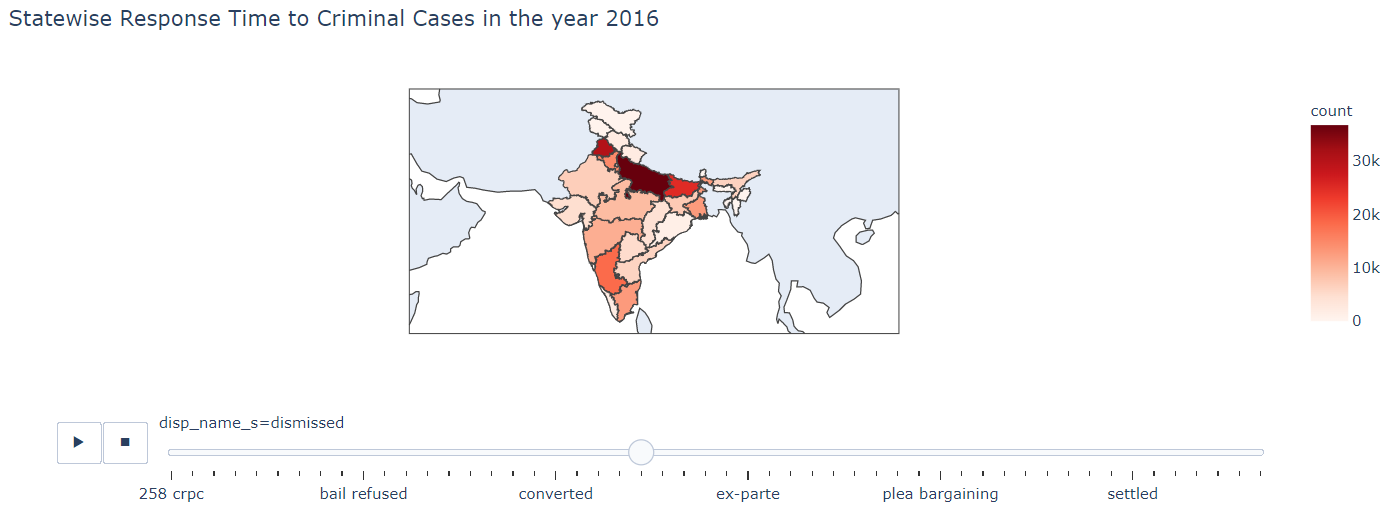

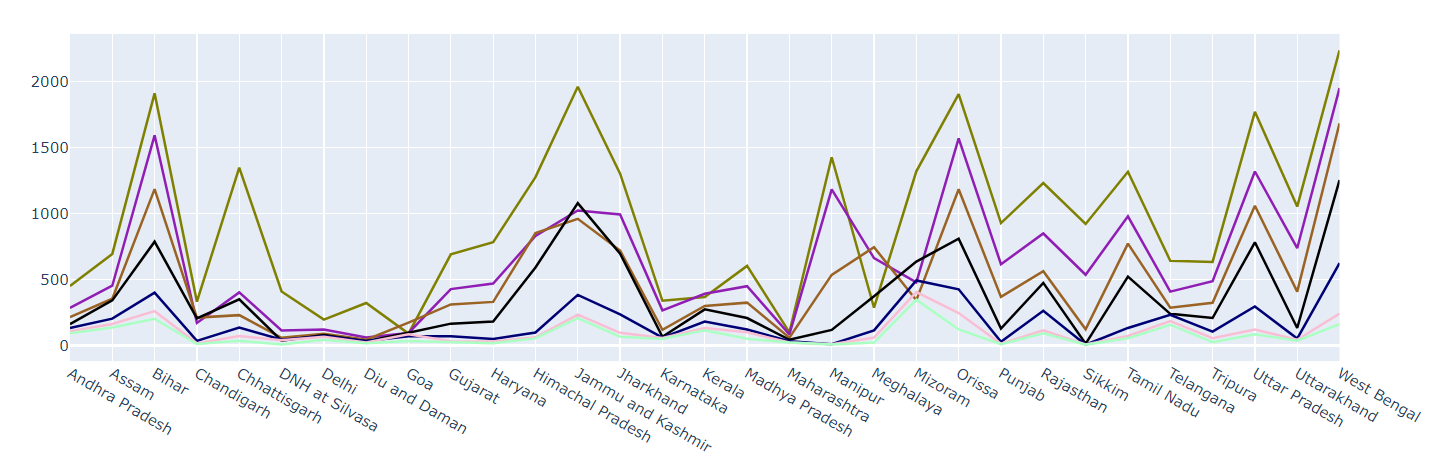

## Insights obtained from analyzing state-wise time taken


# Insight #2
## Analyzing marriage related cases, religion-marriage case count, child marriage case count

### Preprocessing and replacing `int` labels with their names

In [20]:
df = preprocessing_case_csv(year=2014, to_unlabel=True)

In [22]:
df_acts_sections.isnull().sum()

ddl_case_id          0
act                  0
section        4834909
criminal             0
dtype: int64

### Merging with `acts_sections.csv` and replacing `act` with it's name

In [23]:
df = df.merge(df_acts_sections, on=['ddl_case_id'])
df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "act_key.csv"),
                      usecols=['act', 'act_s'])
df = df.merge(df_merge, on='act')

Dropping the `sections` and `date_of_decision` column since they have too many Null values

In [24]:
df = df.drop(columns = ['section'])
df = df.dropna()

In [25]:
df.head()

ddl_case_id  year             judge_position defendant_gender  \
0  01-01-01-201908000022014  2014  chief judicial magistrate   Unclear/Others   
1  01-01-01-201908000072014  2014  chief judicial magistrate             Male   
2  01-01-01-201908000102014  2014  chief judicial magistrate             Male   
3  01-01-01-201908000302014  2014  chief judicial magistrate           Female   
4  01-01-01-201908000422014  2014  chief judicial magistrate             Male   

  petitioner_gender adv_def_gender  adv_pet_gender date_of_filing  \
0              Male        Missing  Unclear/Others     2014-01-03   
1              Male        Missing            Male     2014-01-04   
2            Female        Missing            Male     2014-01-07   
3              Male        Missing            Male     2014-01-21   
4            Female        Missing  Unclear/Others     2014-02-05   

  date_of_decision date_first_list  ... date_next_list   state_name  \
0       2014-10-28      2014-01-16  ...     2014-10-28  Maharashtra   
1       2014-01-04      2014-01-04  ...     2014-01-04  Maharashtra   
2       2014-01-07      2014-01-07  ...     2014-01-07  Maharashtra   
3       2014-01-21      2014-01-21  ...     2014-01-21  Maharashtra   
4       2014-02-05      2014-02-05  ...     2014-02-05  Maharashtra   

  purpose_name_s         disp_name_s type_name_s district_name  \
0          order  disposed-otherwise    cri.m.a.     Nandurbar   
1          order  disposed-otherwise    cri.m.a.     Nandurbar   
2          order  disposed-otherwise    cri.m.a.     Nandurbar   
3          order  disposed-otherwise    cri.m.a.     Nandurbar   
4          order  disposed-otherwise    cri.m.a.     Nandurbar   

                           court_name    act  criminal                  act_s  
0  Chief Judcial Magistrate Nandurbar  17353         1  The Indian Penal Code  
1  Chief Judcial Magistrate Nandurbar  17353         1  The Indian Penal Code  
2  Chief Judcial Magistrate Nandurbar  17353         1  The Indian Penal Code  
3  Chief Judcial Magistrate Nandurbar  17353         1  The Indian Penal Code  
4  Chief Judcial Magistrate Nandurbar  17353         1  The Indian Penal Code  

[5 rows x 21 columns]

In [26]:
df.isnull().sum()

ddl_case_id          0
year                 0
judge_position       0
defendant_gender     0
petitioner_gender    0
adv_def_gender       0
adv_pet_gender       0
date_of_filing       0
date_of_decision     0
date_first_list      0
date_last_list       0
date_next_list       0
state_name           0
purpose_name_s       0
disp_name_s          0
type_name_s          0
district_name        0
court_name           0
act                  0
criminal             0
act_s                0
dtype: int64

### Filtering out all `act_s` with `marriage` or `divorce` in it.
We use regex to do this.

In [ ]:
pattern = '.*(Marriage|marriage|MARRIAGE|Divorce|DIVORCE).*'
df = df[df.act_s.str.match(pattern)]
df.head()

### Displaying all unique`act_s` that were filtered out

In [ ]:
df.act_s.unique()

### Making clusters based on religion
We will try to analyze marriage related cases in different religions.

To do this, we will add a column `act_religion`. <br>
The column will use a regex pattern to detect the religion.

In [82]:
def get_religion(act_s : str):
    pattern_hindu = '.*(Hindu|HINDU|hindu).*'
    pattern_muslim = '.*(muslim|MUSLIM|Muslim).*'
    pattern_christian = '.*(christian|CHRISTIAN|Christian).*'
    pattern_parsi = '.*(parsi|PARSI|Parsi).*'
    
    if bool(re.search(pattern_hindu, act_s)):
        return "Hindu"
    elif bool(re.search(pattern_muslim, act_s)):
        return "Muslim"
    elif bool(re.search(pattern_christian, act_s)):
        return "Christian"
    elif bool(re.search(pattern_parsi, act_s)):
        return "Parsi"
    else:
        return "Unclear"

In [27]:
df['act_religion'] = df.apply(lambda row : get_religion(row['act_s']), axis=1)

Let's display the filtered dataframe for clarity

In [ ]:
df.head()

We will drop columns with unclear religion and study the rest of the dataframe

In [ ]:
df = df[~(df['act_religion']=='Unclear')]
df.head()

## Plotting geoPlot

In [ ]:
# print(df.columns)
freq_religions_state = (df.groupby(['state_name'])['act_religion'].value_counts())
freq_religions_state = freq_religions_state.to_frame()
freq_religions_state.columns = ['count']
freq_religions_state = freq_religions_state.reset_index()

freq_religions_state['state_name'] = freq_religions_state['state_name'].replace(
            ['Jammu and Kashmir', 'Orissa', 'DNH at Silvasa', 'Diu and Daman'],
            ['Jammu & Kashmir', 'Odisha', "Dadra and Nagar Haveli and Daman and Diu", "Dadra and Nagar Haveli and Daman and Diu"]
        )

val = freq_religions_state[freq_religions_state['state_name']=='Jammu & Kashmir'].values

for entry in val:
    freq_religions_state = freq_religions_state.append({
        'state_name' : 'Ladakh',
        'act_religion' : entry[1],
        'count' : entry[2]
    }, ignore_index=True)

freq_religions_state.head(10)

In [ ]:
px.choropleth(
    freq_religions_state,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='state_name',
    color='count',
    animation_frame='act_religion',
    fitbounds="locations",
    color_continuous_scale='YlOrRd',
    title='Court cases by religion in each state'
)

```
NOTE : All these cases give us information about which act the cases uses, so, a sentence that says, "Hindus file more cases" implies "Number of cases filed that use some Hindu-Marriage related act is more than others."
```

# Insights from state/religion-wise choropleth of Marital/Divorce cases
- It is clear that Hindus have the most amount of cases by number.
- Muslims come second at one-tenth of the number of cases filed by Hindus.
- Christians and Parsis have barely any cases.
- Maharashtra is a clear outlier when it comes to such Hindu marriage/divorce cases with almost twice the number of cases than the second highest state, Uttar Pradesh
- Other states have the number of cases in 4 digits, however this is probably directly related to the total amount of Hindu population being higher.
- It is safe to say that Maharashtra, Punjab, Haryana and Uttar Pradesh have significantly more cases than other states.
- These insights might allow a Government/ Research body to closely study at the relationship dynamics of Hindu marriages in these states.
- However, when it comes to Muslim cases, Uttar Pradesh has much more than other states, almost thrice the number of cases compared to the second highest.
- Maharashtra, Karnataka and Kerala have ~500 cases each. Other states are in the double digit range.
- This means that these 4 states have more Muslim marriage cases. However, it is interesting to note that Maharashtra and Uttar Pradesh are the highest ranked in both, Hindu and Muslim cases.
- This also gives insights for the State Governments to conduct studies why this may be the case in Mahrashtra and Uttar Pradesh.
- Most states have no Christian or Parsi cases, this is probably because of lapses in the data collection, however, even now Maharashtra has the most number of Christian cases.

## Generalizing it into a function and plotting necessary plots YoY

In [ ]:
freq_religions_state = None
duration_religions_state = None

In [83]:
def preprocess_insight2_df(year):
    df = preprocessing_case_csv(year=year, to_unlabel=True)

    df = df.merge(df_acts_sections, on=['ddl_case_id'])
    df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "act_key.csv"),
                          usecols=['act', 'act_s'])
    df = df.merge(df_merge, on='act')

    df = df.drop(columns = ['section'])
    df = df.dropna()
    
    pattern = '.*(Marriage|marriage|MARRIAGE|Divorce|DIVORCE).*'
    df = df[df.act_s.str.match(pattern)]
    
    df['act_religion'] = df.apply(lambda row : get_religion(row['act_s']), axis=1)
    
    df = df[~(df['act_religion']=='Unclear')]
    
    return df
    
#     df['duration_of_case'] = df.apply(lambda row : (row['date_of_decision'] - row['date_of_filing']).days, axis=1)

In [84]:
def insight_2(df, year):
    state_vs_time(df, year, 'act_religion', 'count', ['state_name'], "value_counts", None, False, 'act_religion',
                 'Court Marital cases frequency by religion in each state' + str(year))
#     state_vs_time(df, year, 'duration_of_case', 'count', ['state_name', 'act_religion'], "mean", None, False, 'act_religion',
#                  'Court Marital cases duration by religion in each state' + str(year))

In [85]:
df = None

In [ ]:
year = 2010
df = preprocess_insight2_df(year)
insight_2(df, year)
df = NoneSS

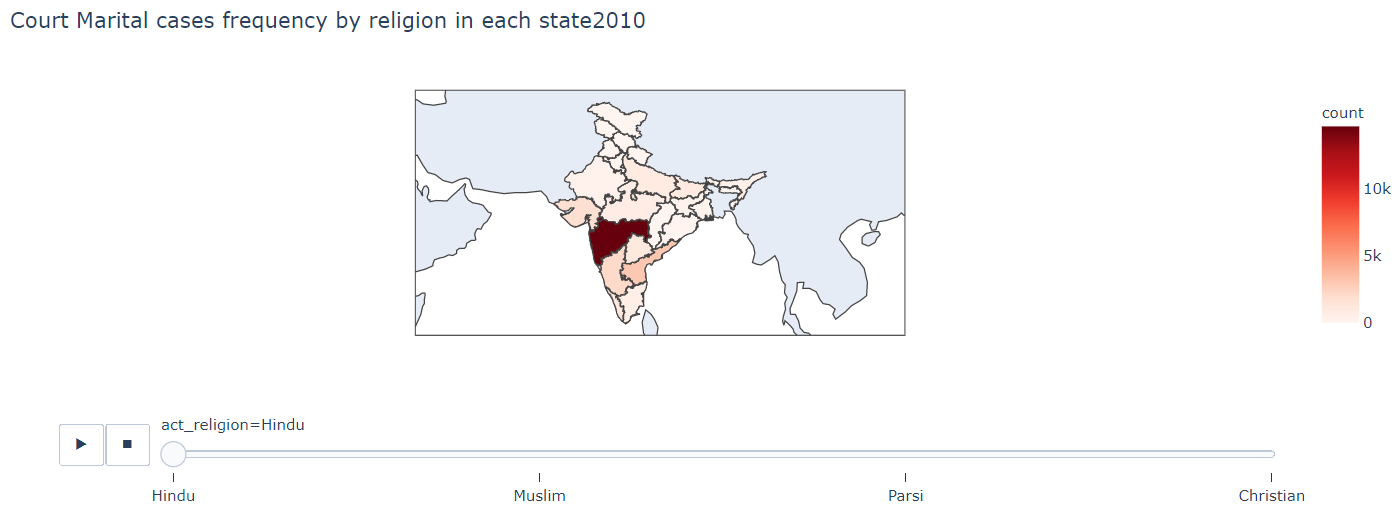
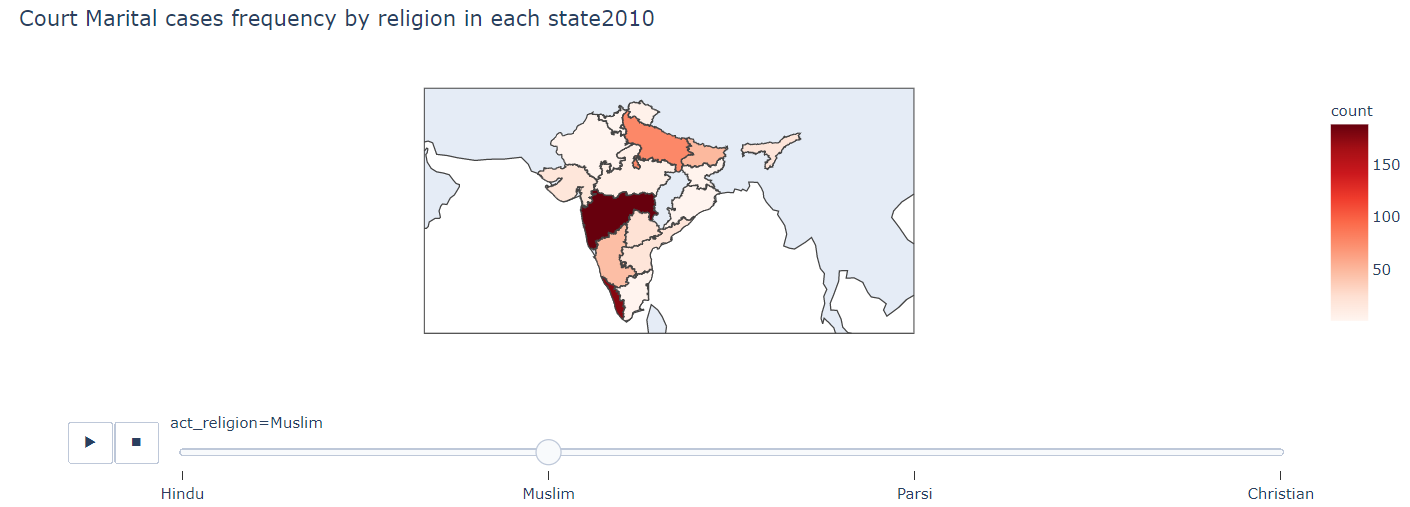
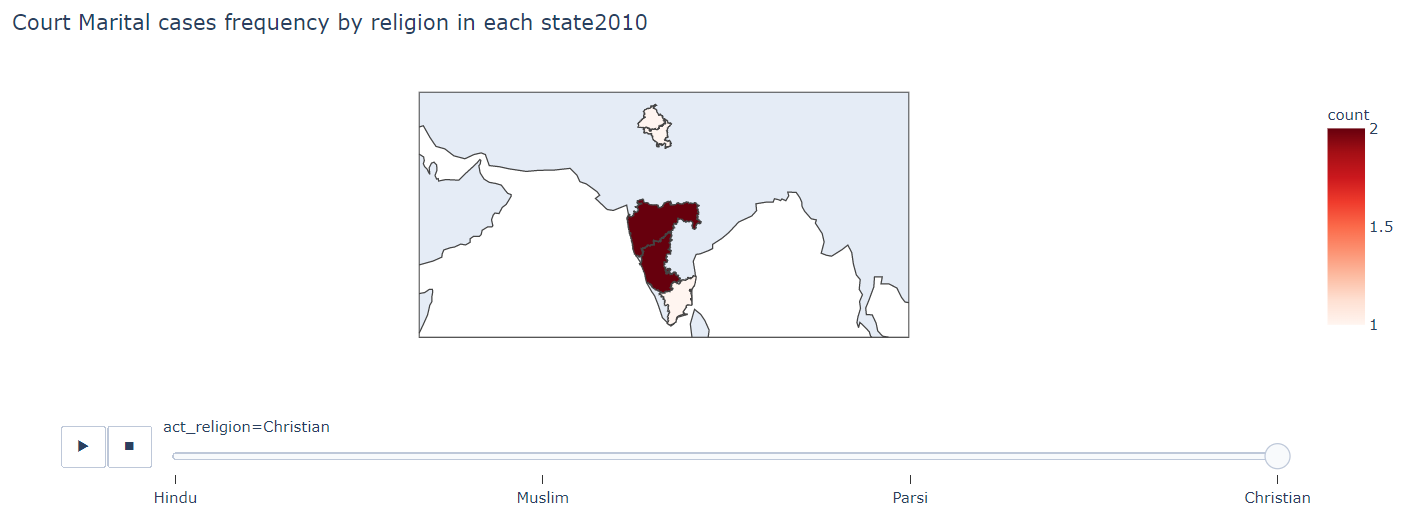
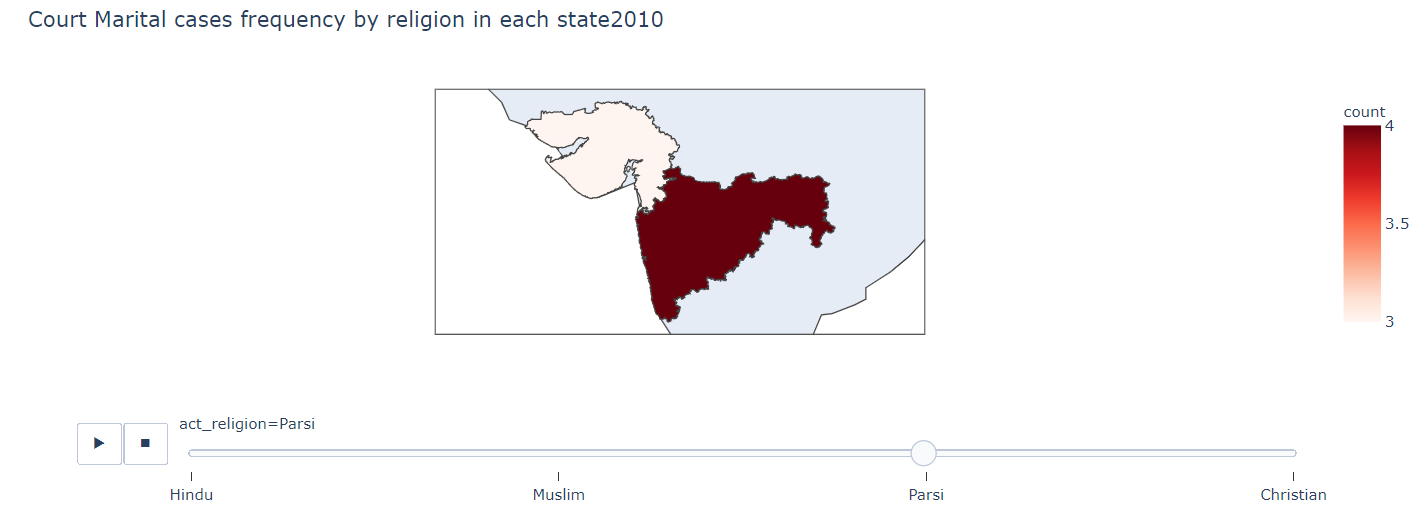

## Insights drawn from the above graph
- Maharashtra had tons of marital cases even 4 years prior to 2014 (the year we checked above)
- Christian and Parsi cases haven't been recorded properly
- This could mean two things
    - Maybe Maharashtra is the only state that has properly collected it's `cases` data.
    - Maybe it is actually the case that there are so many marriage related cases there.
- It would make sense if Maharashtra is the only case properly collecting it's data, since other states seem to have a lot of missing Christian and Parsi data.

# Insight Collection #3
## Checking if there is correlation between child marriage related cases and POCSO cases

In [ ]:
df = preprocessing_case_csv(year=2014, to_unlabel=True)

df = df.merge(df_acts_sections, on=['ddl_case_id'])
df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "act_key.csv"),
                      usecols=['act', 'act_s'])
df = df.merge(df_merge, on='act')

df = df.drop(columns = ['section'])
df = df.dropna()

In [ ]:
pattern = '.*(Child|CHILD|Children|child).*(Marriage|MARRIAGE|marriage).*'
df_child_marriage = df[df.act_s.str.match(pattern)]
df_child_marriage.head()

> 

In [ ]:
pattern = '.*(POCSO|pocso|posco|Pocso).*'
df_pocso = df[df.act_s.str.match(pattern)]
df_pocso.head()

In [ ]:
def get_type(act_s : str):
    pattern_child_marriage = '.*(Child|CHILD|Children|child).*(Marriage|MARRIAGE|marriage).*'
    pattern_pocso = '.*(POCSO|pocso|posco|Pocso).*'
    
    if bool(re.search(pattern_child_marriage, act_s)):
        return "Child Marriage"
    elif bool(re.search(pattern_pocso, act_s)):
        return "POCSO"
    else:
        return "Unclear"

dff['child_crime_type'] = df.apply(lambda row : get_type(row['act_s']), axis=1)

In [ ]:
df = df[~(df['act_s']=='Unclear')]
df.head()

# Pre-classification section

We will try cleaning the data which includes:
- Handling null values
- Feature scaling
- Handling categorical variables

But, before we begin, we must choose our classification problem. 

A few options look interesting:
- Predicting if number of cases that will be filed on a given day in a particular court will be greater than the last day or not.
- Predicting the disposition of given case
- Predicting if the disposition is dismission of the case.

Let us start off with the third one:
## Predicting if the disposition is dismission of the case
This is an example of **binary classification**

The first thing that is to be done is to use the `disp_name_key.csv` to replace the `disp_name` in every `case_{year}.csv` file.

### Merging case and disposition csv files

In [ ]:
df = preprocessing_case_csv(2014)
df_disp = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "disp_name_key.csv"))

df = df.merge(df_disp, on=['year', 'disp_name'])
df = df.drop(columns='count')
df.head(10)

In [ ]:
df.adv_def_gender.value_counts()

In [ ]:
df_acts_section = pd.read_csv(ACTS_SECTIONS_CSV, usecols=['ddl_case_id', 'act', 'criminal'])

In [ ]:
df = df.merge(df_acts_section, on=['ddl_case_id'])

In [ ]:
df.head(10)

# Problem
## Checking if the case will be dismissed or not
Such a model can help legal practitioners identify cases which are likely to be dismissed. If the chances of a case being dismissed are high, then such a case will be handled differently

## Feature Engineering and Data Splits

In [21]:
def is_dismissed(disp_name : str):
    if disp_name == "dismissed":
        return 1
    else:
        return 0

In [25]:
def preprocessing_data(year=None, test_mode=False):
    df = preprocessing_case_csv(year, test_mode=test_mode)

    ### Joining disposition names
    df_merge = pd.read_csv(os.path.join(KEYS_CSV_FOLDER, "disp_name_key.csv"),
                          usecols=['year', 'disp_name', 'disp_name_s'])
    df = df.merge(df_merge, on=['year', 'disp_name'])

    ### Adding column to indicate 1:Dismissed or 0:Not dismissed
    df['dismission'] = df['disp_name_s'].apply(lambda curr_disp_name : is_dismissed(curr_disp_name))

    ### Remmoving entries with disposition not recorded
    df = df[~(df['disp_name_s'] == "disposition var missing")]

    ### Adding act, section and criminal data by merging with `df_acts_sections`
    df = df.merge(df_acts_sections, on=['ddl_case_id'])
    
    ### Removing unnecessary columns
    df = df.drop(columns=['ddl_case_id', 'year', 'cino', 'disp_name_s', 'court_no','date_of_decision'])
    
    ### Changing dates to duration 
    df = df.dropna()
    df['first_hearing_wait'] = (df['date_first_list'] - df['date_of_filing']).dt.days
    df['curr_hearing_wait'] = (df['date_next_list'] - df['date_last_list']).dt.days
    df['hearing_time_running'] = (df['date_last_list'] - df['date_first_list']).dt.days
    
    ### Conveting to int64
    df['purpose_name'] = df['purpose_name'].astype('int64')
    df['act'] = df['act'].astype('int64')
    df['section'] = df['section'].astype('int64')
    
    ### Removing date columns
    df = df.drop(columns=['date_of_filing', 'date_first_list', 'date_last_list', 'date_next_list'])

    return df

df_test = preprocessing_data(2011)
df_test.head()

state_code dist_code             judge_position defendant_gender  \
1          1         1  chief judicial magistrate             Male   
3          1         1  chief judicial magistrate   Unclear/Others   
4          1         1  chief judicial magistrate   Unclear/Others   
5          1         1  chief judicial magistrate             Male   
6          1         1  chief judicial magistrate             Male   

  petitioner_gender adv_def_gender  adv_pet_gender  type_name  purpose_name  \
1            Female        Missing            Male       1683          4613   
3              Male           Male            Male       1683          2797   
4              Male           Male            Male       1683          2797   
5    Unclear/Others        Missing            Male       1683          4762   
6            Female        Missing  Unclear/Others       1683          3737   

   disp_name  dismission   act  section  criminal  first_hearing_wait  \
1         25           0  4759   132871         1                   0   
3         25           0  4759  1123673         1                   3   
4         25           0  4759  1123673         1                  10   
5         25           0  8133   584866         0                   9   
6         25           0  4759   132871         1                   0   

   curr_hearing_wait  hearing_time_running  
1                 30                    89  
3                  0                     0  
4                  1                    13  
5                 36                    67  
6                 42                   260

## Data split

In [26]:
df = None

In [27]:
def encode_and_data_split(df):
    df = df.dropna()

    ### Encoding other columns
    le = LabelEncoder()
    df['state_code'] = le.fit_transform(df['state_code']) 
    df['dist_code'] = le.fit_transform(df['dist_code'])
    df['judge_position'] = le.fit_transform(df['judge_position']) 
    df['defendant_gender'] = le.fit_transform(df['defendant_gender'])
    df['petitioner_gender'] = le.fit_transform(df['petitioner_gender'])
    df['adv_def_gender'] = le.fit_transform(df['adv_def_gender'])
    df['adv_pet_gender'] = le.fit_transform(df['adv_pet_gender'])
    df['first_hearing_wait'] = le.fit_transform(df['first_hearing_wait']) 
    df['curr_hearing_wait'] = le.fit_transform(df['curr_hearing_wait'])
    df['hearing_time_running'] = le.fit_transform(df['hearing_time_running'])

    ### Splitting with respect to dismissionn
    missing=df[df['dismission'].isnull()]
    fill=df[df['dismission'].notnull()]

    y=fill['dismission']
    print(y.value_counts())
    x=fill.drop(columns = ['dismission', 'disp_name'])

    ### Encode the dismission column
    x=pd.get_dummies(x,drop_first=True)

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2
                                                   ,random_state=101)

    return x_train,x_test,y_train,y_test

dfcp = df_test

x_train,x_test,y_train,y_test = encode_and_data_split(dfcp)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

0    1544693
1     251478
Name: dismission, dtype: int64


### Using Naive Bayes

In [28]:
from sklearn.naive_bayes import BernoulliNB 

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.metrics import confusion_matrix,classification_report

In [32]:
def naive_bayes(x_train=None, x_test=None, y_train=None, y_test=None):
    b=BernoulliNB()
    b.fit(x_train,y_train) 

    pred2=b.predict(x_test)
    pred1=b.predict(x_train)
    print("Accuracy Score = ", accuracy_score(y_test,pred2))

    print("\n")

    cm = confusion_matrix(y_test,pred2)
    
    print("Accuracy when actually not dismissed", cm[0][0]/(cm[0][1] + cm[0][0]))
    print("Accuracy when actually dismissed", cm[1][1]/(cm[1][0] + cm[1][1]))
    
    print("\n")

    print("f1_Score = ", f1_score(y_test, pred2))
    
#     print(classification_report(y_test,pred2)) #shows all 
    
naive_bayes(x_train,x_test,y_train,y_test)

Accuracy Score =  0.8576140966219884


Accuracy when actually not dismissed 0.9944036920087442
Accuracy when actually dismissed 0.020570749108204518


f1_Score =  0.03900349453274716


```
Accuracy Score =  0.8576140966219884

Accuracy when actually not dismissed 0.9944036920087442
Accuracy when actually dismissed 0.020570749108204518

f1_Score =  0.03900349453274716
```

Clearly, the Naive-Bayes model cannot properly guess the dismission when it was actually dismissed.
The reason this might be happening is because there are much more number of cases where. This scenario comes to light properly when we see that the f1_score is extremely poor 

## Using Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
def logistic_regression(x_train=None, x_test=None, y_train=None, y_test=None):
    lr=LogisticRegression()
    lr.fit(x_train,y_train) 

    print("Accuracy Score = ", accuracy_score(y_test,pred2))

    print("\n")

    cm = confusion_matrix(y_test,pred2)
    
    print("Accuracy when actually not dismissed", cm[0][0]/(cm[0][1] + cm[0][0]))
    print("Accuracy when actually dismissed", cm[1][1]/(cm[1][0] + cm[1][1]))
    
    print("\n")

    print("f1_Score = ", f1_score(y_test, pred2))
    
naive_bayes(x_train,x_test,y_train,y_test)

Accuracy Score =  0.8576140966219884


Accuracy when actually not dismissed 0.9944036920087442
Accuracy when actually dismissed 0.020570749108204518


f1_Score =  0.03900349453274716


```
Accuracy Score =  0.8576140966219884


Accuracy when actually not dismissed 0.9944036920087442
Accuracy when actually dismissed 0.020570749108204518


f1_Score =  0.03900349453274716
```

Logistic Regression also performs poorly, Naive-Bayes and Logistic Regression probably just keep spitting `dismission=`$0$

## Decision tree classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
def decision_tree(x_train=None, x_test=None, y_train=None, y_test=None):
    d=DecisionTreeClassifier()
    d.fit(x_train,y_train)
    y_pred=d.predict(x_test)

    print("Accuracy Score = ", accuracy_score(y_test,y_pred))

    print("\n")

    cm = confusion_matrix(y_test,y_pred)
    
    print("Accuracy when actually not dismissed", cm[0][0]/(cm[0][1] + cm[0][0]))
    print("Accuracy when actually dismissed", cm[1][1]/(cm[1][0] + cm[1][1]))
    
    print("\n")

    print("f1_Score = ", f1_score(y_test, y_pred))
    
decision_tree(x_train, x_test, y_train, y_test)

Accuracy Score =  0.8693167425223043


Accuracy when actually not dismissed 0.9218945834345397
Accuracy when actually dismissed 0.5475822433610781


f1_Score =  0.5406817470256731


```
Accuracy Score =  0.8693167425223043


Accuracy when actually not dismissed 0.9218945834345397
Accuracy when actually dismissed 0.5475822433610781


f1_Score =  0.5406817470256731
```

This is a massive improvement!! Which means that any model that is dependent on how probabilistic the outcome is will certainly fail to classify data that has a massive class imbalance.

### Random forest classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
def random_forest(x_train=None, x_test=None, y_train=None, y_test=None):
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)

    print("Accuracy Score = ", accuracy_score(y_test,y_pred))

    print("\n")

    cm = confusion_matrix(y_test,y_pred)
    
    print("Accuracy when actually not dismissed", cm[0][0]/(cm[0][1] + cm[0][0]))
    print("Accuracy when actually dismissed", cm[1][1]/(cm[1][0] + cm[1][1]))
    
    print("\n")

    print("f1_Score = ", f1_score(y_test, y_pred))

random_forest(x_train, x_test, y_train, y_test)

Accuracy Score =  0.9034865756399014


Accuracy when actually not dismissed 0.9723196502307505
Accuracy when actually dismissed 0.4822829964328181


f1_Score =  0.5839962564342536


```
Accuracy Score =  0.9034865756399014


Accuracy when actually not dismissed 0.9723196502307505
Accuracy when actually dismissed 0.4822829964328181


f1_Score =  0.5839962564342536
```

The f1_score has risen here too, the accuracy has finally crossed 90%

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
def svm(x_train=None, x_test=None, y_train=None, y_test=None):
    svc=SVC()
    svc.fit(x_train,y_train)
    y_pred=svc.predict(x_test)

    print(accuracy_score(y_test,y_pred))
    
    print("\n")

    cm = confusion_matrix(y_test,y_pred)
    
    print(cm)
    
    print("Accuracy when actually not dismissed", cm[0][0]/(cm[0][1] + cm[0][0]))
    print("Accuracy when actually dismissed", cm[1][1]/(cm[1][0] + cm[1][1]))
    
    print("\n")

svm(x_train, x_test, y_train, y_test)

# Bibliography
- https://stackoverflow.com/questions/50089903/convert-column-to-timestamp-pandas-dataframe
- https://www.geeksforgeeks.org/get-minimum-values-in-rows-or-columns-with-their-index-position-in-pandas-dataframe/
- https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe
- https://www.w3schools.com/python/pandas/ref_df_min.asp#:~:text=The%20min()%20method%20returns,minimum%20value%20for%20each%20row.
- https://www.geeksforgeeks.org/how-to-sort-a-pandas-dataframe-by-date/
- https://www.datasciencemadesimple.com/create-frequency-table-of-column-in-pandas-python-2/
- https://datagy.io/pandas-value-counts/
- https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
- https://stackoverflow.com/questions/32888124/pandas-out-of-bounds-nanosecond-timestamp-after-offset-rollforward-plus-adding-a
-  https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe
-  https://stackoverflow.com/questions/26097916/convert-pandas-series-to-dataframe
-  https://stackoverflow.com/questions/61233041/module-not-found-error-no-module-named-chart-studio
-  https://plotly.com/python/ipython-notebook-tutorial/
- https://stackoverflow.com/questions/68149831/find-if-date-is-weekend-or-weekday-in-pandas-dataframe
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
- https://stackoverflow.com/questions/28503445/assigning-column-names-to-a-pandas-series
- https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem
- https://pynative.com/pandas-set-index/
- https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition
- https://stackoverflow.com/questions/62230507/multiple-columns-for-hue-parameter-in-seaborn-violinplot
- https://seaborn.pydata.org/generated/seaborn.violinplot.html
- https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy
- https://stackoverflow.com/questions/47002168/correlation-between-two-non-numeric-columns-in-a-pandas-dataframe
- https://stackoverflow.com/questions/48673428/python-pandas-pairwise-frequency-table-with-many-columns
- https://stackoverflow.com/questions/47002168/correlation-between-two-non-numeric-columns-in-a-pandas-dataframe
- https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas